<h1 style="color:DodgerBlue;">IIM-K Capestone Project Models - Purchase predict</h1>


<strong style="color:Tomato;"> Load Libraries </strong>    


In [3]:
#import libraries for data handling
import os
import pandas as pd
import numpy as np

#import for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#import for Linear regression
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

<h1 style="color:DodgerBlue;">Create Model - Customer Purchase Preference</h1>

<strong style="color:Tomato;"> Load data</strong>    


In [64]:
import pandas as pd
base1 = pd.read_csv("C:\Vibhaas\Artist of Analytics\ADSM IIM K\CapeStone Project\Data\Basedata_0.csv")
base1.head()


base2 = pd.read_csv("C:\Vibhaas\Artist of Analytics\ADSM IIM K\CapeStone Project\Data\purchase_preference_data_0.csv")
base2.head()

customer_id purchase_interest transaction_date  transaction_month  \
0     10000020       Restaurants       06-02-2019                  2   
1     10000020       Restaurants       19-02-2019                  2   
2     10000020       Restaurants       20-03-2019                  3   
3     10000020       Restaurants       03-05-2019                  5   
4     10000020       Restaurants       19-08-2019                  8   

   tran_amount  mcc_code mcc_description                     merchant_name  \
0        25.42      5811        Caterers      Restobar - The Senator Hotel   
1        27.08      5811        Caterers             The Street - The Park   
2        31.25      5811        Caterers                The Jungle Terrace   
3        30.00      5811        Caterers  The Roost - Urban Bistro And Bar   
4        27.08      5811        Caterers                KALYAN VEG PLATTER   

  merchant_country merchant_city  ... mar_status_S  gender_M  \
0            india       kolkata  ...            0         1   
1            india       kolkata  ...            0         1   
2            india     bengaluru  ...            0         1   
3            india         delhi  ...            0         1   
4            india      thrissur  ...            0         1   

  customer_country_India  customer_country_Malaysia customer_country_Oman  \
0                      1                          0                     0   
1                      1                          0                     0   
2                      1                          0                     0   
3                      1                          0                     0   
4                      1                          0                     0   

  customer_country_Singapore  customer_country_Thailand  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   customer_country_United Arab Emirates  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

                                card_id  \
0  97c17dcc-4db8-4cb2-934d-a490ae51e1c7   
1  97c17dcc-4db8-4cb2-934d-a490ae51e1c7   
2  97c17dcc-4db8-4cb2-934d-a490ae51e1c7   
3  97c17dcc-4db8-4cb2-934d-a490ae51e1c7   
4  97c17dcc-4db8-4cb2-934d-a490ae51e1c7   

                                             tran_id  
0  1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...  
1  1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...  
2  1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...  
3  1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...  
4  1000002097c17dcc-4db8-4cb2-934d-a490ae51e1c720...  

[5 rows x 54 columns]

<strong style="color:Tomato;"> Customer Demographics and Spend pattern </strong>    


In [5]:

# Create Customer Demographics
customer_demographic1 = base1[['customer_id',  'cust_lvl',  'age', 'AgeGroup', 'Credit_limit_Group', 'c_tier',  'c_city_grp' 
, 'c_Region_E', 'c_Region_N', 'c_Region_S', 'c_Region_W'
,'mar_status_M','mar_status_S', 'gender_M', 'customer_country_India']]

customer_demographic = customer_demographic1.drop_duplicates(subset=['customer_id'])

print("customer_demographic with size : ", customer_demographic.shape)


df_cust_freq = base1.groupby(['customer_id']).count()[['tran_amount']].reset_index()

# Rename 
df_cust_freq.rename(columns={"tran_amount": "cust_freq"}, inplace = True)


df_cust_spent = base1.groupby(['customer_id']).sum()[['tran_amount']].reset_index()

# Rename 
df_cust_spent.rename(columns={"tran_amount": "cust_spent"}, inplace = True)

# Merge 
df_cust_freq_spent = pd.merge(df_cust_freq, df_cust_spent, left_on=['customer_id'], right_on=['customer_id'], how='outer')


print("df_cust_freq_spent with size : ", df_cust_freq_spent.shape)


#change_city,change_state, change_country


df_cust_city_change = base1.groupby(['customer_id']).sum()[['change_city']].reset_index()
df_cust_state_change = base1.groupby(['customer_id']).sum()[['change_state']].reset_index()
df_cust_country_change = base1.groupby(['customer_id']).sum()[['change_country']].reset_index()


# Merge 
df_cust_loc_change1 = pd.merge(df_cust_city_change, df_cust_state_change, left_on=['customer_id'], right_on=['customer_id'], how='outer')
df_cust_loc_change = pd.merge(df_cust_loc_change1, df_cust_country_change, left_on=['customer_id'], right_on=['customer_id'], how='outer')

print("df_cust_loc_change with size : ", df_cust_loc_change.shape)


customer_demographic with size :  (9533, 15)
df_cust_freq_spent with size :  (9533, 3)
df_cust_loc_change with size :  (9533, 4)


<strong style="color:Tomato;"> Customer purchase pattern for Purchase Interest </strong>    


In [14]:
#Restaurant
df_basedata_pp = base2[base2['purchase_interest'].isin(['Restaurants'])]


df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'purchase_interest']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='purchase_interest', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
df_summdata_cust_pi_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.add_prefix('cust_pi_cn_')
print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_pi_cn.shape)


df_basedata_9_month_cn = df_basedata_pp.groupby(['customer_id', 'transaction_month']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_month_cn = pd.pivot_table(df_basedata_9_month_cn, index='customer_id', columns='transaction_month', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_month_cn.columns = df_summdata_cust_month_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_month_cn.columns.name = None               #remove mcc_code
df_summdata_cust_month_cn = df_summdata_cust_month_cn.reset_index()                #index to columns
df_summdata_cust_month_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_month_cn = df_summdata_cust_month_cn.add_prefix('cust_month_cn_')
print("df_summdata_cust_month_cn with size : ", df_summdata_cust_month_cn.shape)


df_basedata_9_dow_cn = df_basedata_pp.groupby(['customer_id', 'transaction_dayofweek']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_dow_cn = pd.pivot_table(df_basedata_9_dow_cn, index='customer_id', columns='transaction_dayofweek', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_dow_cn.columns = df_summdata_cust_dow_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_dow_cn.columns.name = None               #remove mcc_code
df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.reset_index()                #index to columns
# Rename 
df_summdata_cust_dow_cn.rename(columns={"cust_dow_cn_0": "cust_dow_cn_mon", "cust_dow_cn_1": "cust_dow_cn_tue", "cust_dow_cn_2": "cust_dow_cn_wed", "cust_dow_cn_3": "cust_dow_cn_thr", "cust_dow_cn_4": "cust_dow_cn_fri", "cust_dow_cn_5": "cust_dow_cn_sat", "cust_dow_cn_6": "cust_dow_cn_sun"}, inplace = True)
df_summdata_cust_dow_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.add_prefix('cust_dow_cn_')
print("df_summdata_cust_dow_cn with size : ", df_summdata_cust_dow_cn.shape)


# Merge 
summ1_pp = pd.merge(customer_demographic, df_cust_freq_spent, left_on=['customer_id'], right_on=['customer_id'], how='left')
summ2_pp = pd.merge(summ1_pp, df_cust_loc_change, left_on=['customer_id'], right_on=['customer_id'], how='left')


summ3_pp = pd.merge(summ2_pp, df_summdata_cust_pi_cn, left_on=['customer_id'], right_on=['cust_pi_cn_customer_id'], how='left')

summ4_pp = pd.merge(summ3_pp, df_summdata_cust_dow_cn, left_on=['customer_id'], right_on=['cust_dow_cn_customer_id'], how='left')

summ5_pp1 = pd.merge(summ4_pp, df_summdata_cust_month_cn, left_on=['customer_id'], right_on=['cust_month_cn_customer_id'], how='left')



# Drop Columns from right side

summ5_pp1.drop(['cust_pi_cn_customer_id','cust_month_cn_customer_id', 'cust_dow_cn_customer_id'], axis=1, inplace=True)


summ5_pp1['purchase'] = np.where(summ5_pp1['cust_month_cn_11'] > 0, 1, 0)

print("size before dropping null", summ5_pp1.shape)
## using dropna() function  
summ5_pp = summ5_pp1.dropna()
print("size after dropping null", summ5_pp.shape)

df_summdata_cust_pi_cn with size :  (6528, 2)
df_summdata_cust_month_cn with size :  (6528, 12)
df_summdata_cust_dow_cn with size :  (6528, 8)
size before dropping null (9533, 40)
size after dropping null (6528, 40)


In [133]:
summ5_pp.head()

customer_id  cust_lvl  age  AgeGroup  Credit_limit_Group  c_tier  \
5      10000553         2   57         5                   0       1   
6      10000652         1   46         5                   1       1   
12     10001161         3   41         4                   1       1   
13     10001215         3   45         5                   0       1   
15     10001421         3   42         4                   0       1   

    c_city_grp  c_Region_E  c_Region_N  c_Region_S  ...  cust_month_cn_3  \
5            2           0           1           0  ...              1.0   
6            2           0           1           0  ...              3.0   
12           1           0           0           1  ...              2.0   
13           1           0           0           0  ...              7.0   
15           1           1           0           0  ...              1.0   

    cust_month_cn_4  cust_month_cn_5  cust_month_cn_6  cust_month_cn_7  \
5               1.0              0.0              0.0              1.0   
6               0.0              3.0              0.0              3.0   
12              2.0              4.0              3.0              3.0   
13              5.0              5.0              0.0              1.0   
15              1.0              2.0              0.0              1.0   

    cust_month_cn_8  cust_month_cn_9  cust_month_cn_10  cust_month_cn_11  \
5               0.0              1.0               1.0               0.0   
6               2.0              3.0               0.0               0.0   
12              2.0              1.0               0.0               1.0   
13              2.0              5.0               4.0               4.0   
15              0.0              0.0               3.0               2.0   

    purchase  
5          0  
6          0  
12         1  
13         1  
15         1  

[5 rows x 40 columns]

<strong style="color:Tomato;"> EDA</strong>    


[07:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy: 0.7519142419601837


Text(0.5, 0, 'Xgboost Feature Importance')

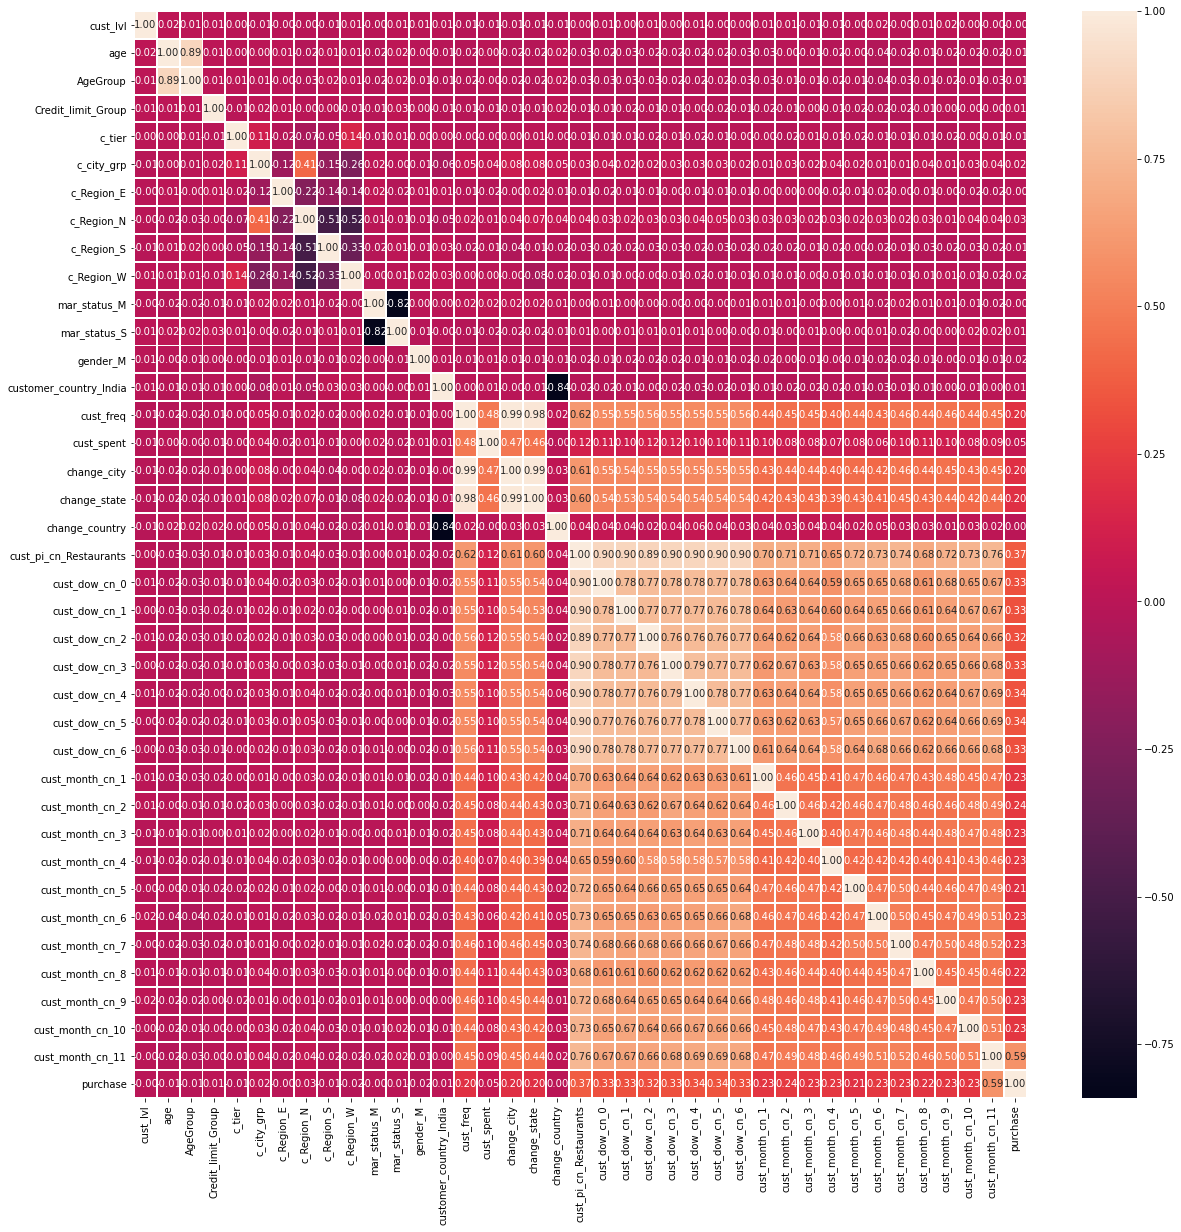

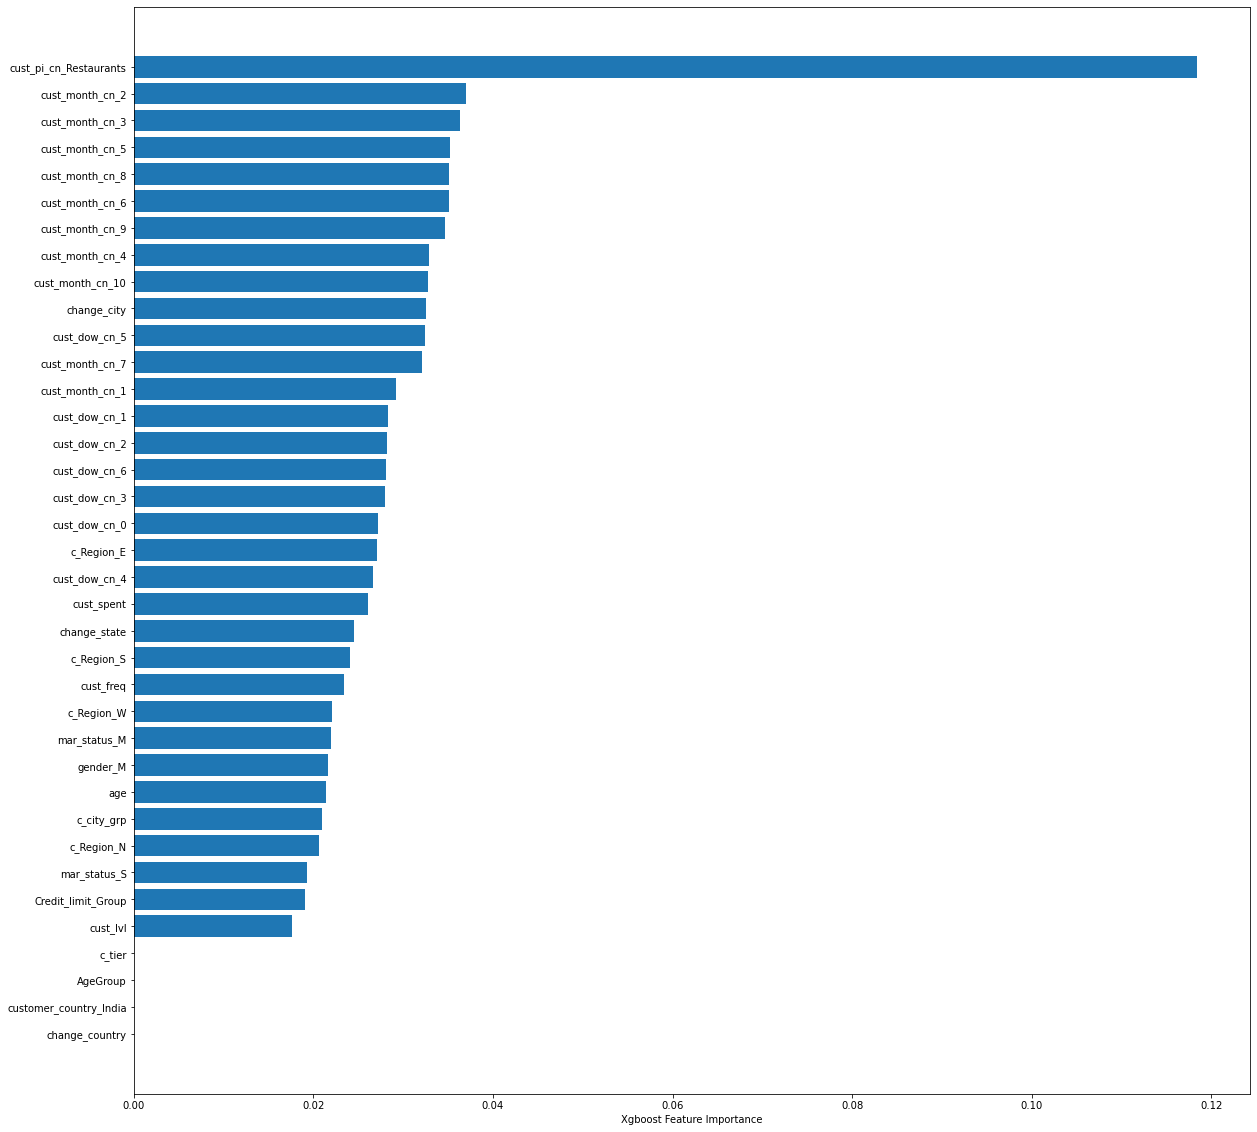

In [7]:
df_basedata_train_1 = summ5_pp.copy()
df_basedata_train_1.drop(['customer_id'], axis=1, inplace=True)

f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)





from sklearn.model_selection import train_test_split, cross_val_score

summ5_pp1 = summ5_pp.copy()
# drop unique
summ5_pp1.drop(['customer_id','cust_month_cn_11'], axis=1, inplace=True)

modeling_data = summ5_pp1

X = modeling_data.drop("purchase", axis=1)
y = modeling_data["purchase"]

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error as MSE
# define model
model = XGBClassifier()
model.fit(X_train,y_train)

# Predict the model
y_pred = model.predict(X_test)
  
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("XGB Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20,20))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

<strong style="color:Tomato;"> Create Multiple Classification Models for Restaurants </strong>    


[07:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo  Accuracy  execution_time
0    SVC    0.5299            1.19
1    KNN    0.5776            0.21
2     NB    0.6164            0.02
3  Dtree    0.6369            0.06
4     RF    0.7212            0.78
5     LR    0.7260            0.07
6    XGB    0.7298            0.42


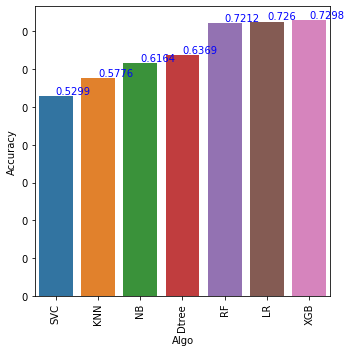

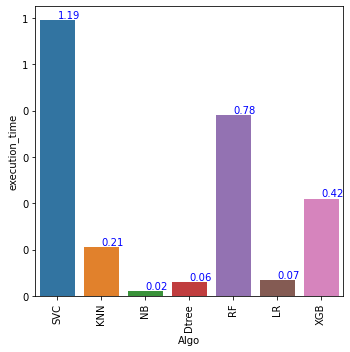

[07:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:50:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    Algo      f1  execution_time
0     NB  0.5192            0.01
1    KNN  0.6007            0.22
2    SVC  0.6111            1.13
3  Dtree  0.6630            0.05
4     LR  0.7279            0.08
5     RF  0.7510            0.82
6    XGB  0.7565            0.42
[07:50:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

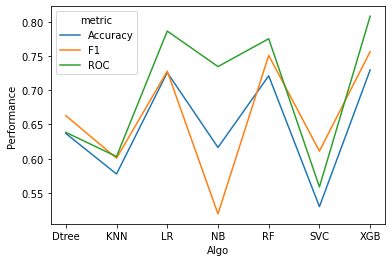

In [8]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import time

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    

pd.DataFrame(result)
    
dfa = pd.DataFrame(result, columns =['Algo', 'Accuracy', 'execution_time']) 
dfa 

# sort df by Count column
pd_df = dfa.sort_values(['Accuracy']).reset_index(drop=True)
print (pd_df)


plt.figure(figsize=(5,5))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Accuracy)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="Accuracy")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["Accuracy"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,5))
# plot bar chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.execution_time)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Algo", ylabel="execution_time")
# add proper Dim values as x labels

ax.set_xticklabels(pd_df.Algo)
for item in ax.get_xticklabels(): item.set_rotation(90)
for i, v in enumerate(pd_df["execution_time"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
plt.tight_layout()
plt.show()




#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "f1")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    
pd.DataFrame(result)
    
dff = pd.DataFrame(result, columns =['Algo', 'f1', 'execution_time']) 
dff 

# sort df by Count column
pd_df_f = dff.sort_values(['f1']).reset_index(drop=True)
print (pd_df_f)



#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

result = []
#measure the accuracy 
for name,model in models:
    start_time = time.time()
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "roc_auc")
    execution_time = (time.time() - start_time)
    result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))
    

pd.DataFrame(result)
    
dfr = pd.DataFrame(result, columns =['Algo', 'roc_auc', 'execution_time']) 
dfr 

# sort df by Count column
pd_df_r = dfr.sort_values(['roc_auc']).reset_index(drop=True)
print (pd_df_r)



# Merge 
pd_df1 = pd_df.copy()
pd_df1.drop(['execution_time'], axis=1, inplace=True)

pd_df_f1 = pd_df_f.copy()
pd_df_f1.drop(['execution_time'], axis=1, inplace=True)

pd_df_r1 = pd_df_r.copy()
pd_df_r1.drop(['execution_time'], axis=1, inplace=True)


result1_pp = pd.merge(pd_df1, pd_df_f1, left_on=['Algo'], right_on=['Algo'], how='left')
result2_pp = pd.merge(result1_pp, pd_df_r1, left_on=['Algo'], right_on=['Algo'], how='left')

result2_pp


# Rename 
pd_df1.rename(columns={"Accuracy": "Performance"}, inplace = True)
pd_df_f1.rename(columns={"f1": "Performance"}, inplace = True)
pd_df_r1.rename(columns={"roc_auc": "Performance"}, inplace = True)

pd_df1['metric'] = 'Accuracy'
pd_df_f1['metric'] = 'F1'
pd_df_r1['metric'] = 'ROC'

df_performance1 = pd_df1

df_performance2 = df_performance1.append(pd_df_f1)

df_performance = df_performance2.append(pd_df_r1)
df_performance
df_performance = df_performance.sort_values(["Algo","metric"], ascending = (True, True))

sns.lineplot(data=df_performance, x="Algo", y="Performance", hue = 'metric')

import plotly.express as px

df = df_performance
fig = px.line(df, x="Algo", y="Performance", color = 'metric')

fig.show()

In [134]:
pi

array(['Restaurants', 'Retail_Outlet', 'Household', 'Art', 'Airlines',
       'Lodging', 'Clothing'], dtype=object)

In [55]:
pi = base2.purchase_interest.unique()
for x in pi:
    df_basedata_pp = base2[base2['purchase_interest'].isin([x])]
    print('Size of df',x,df_basedata_pp.shape)

In [132]:
type(pi)

numpy.ndarray

Size of df Restaurants (139569, 54)
df_summdata_cust_pi_cn with size :  (6528, 2)
df_summdata_cust_month_cn with size :  (6528, 12)
df_summdata_cust_dow_cn with size :  (6528, 8)
size before dropping null (9533, 40)
size after dropping null (6528, 40)


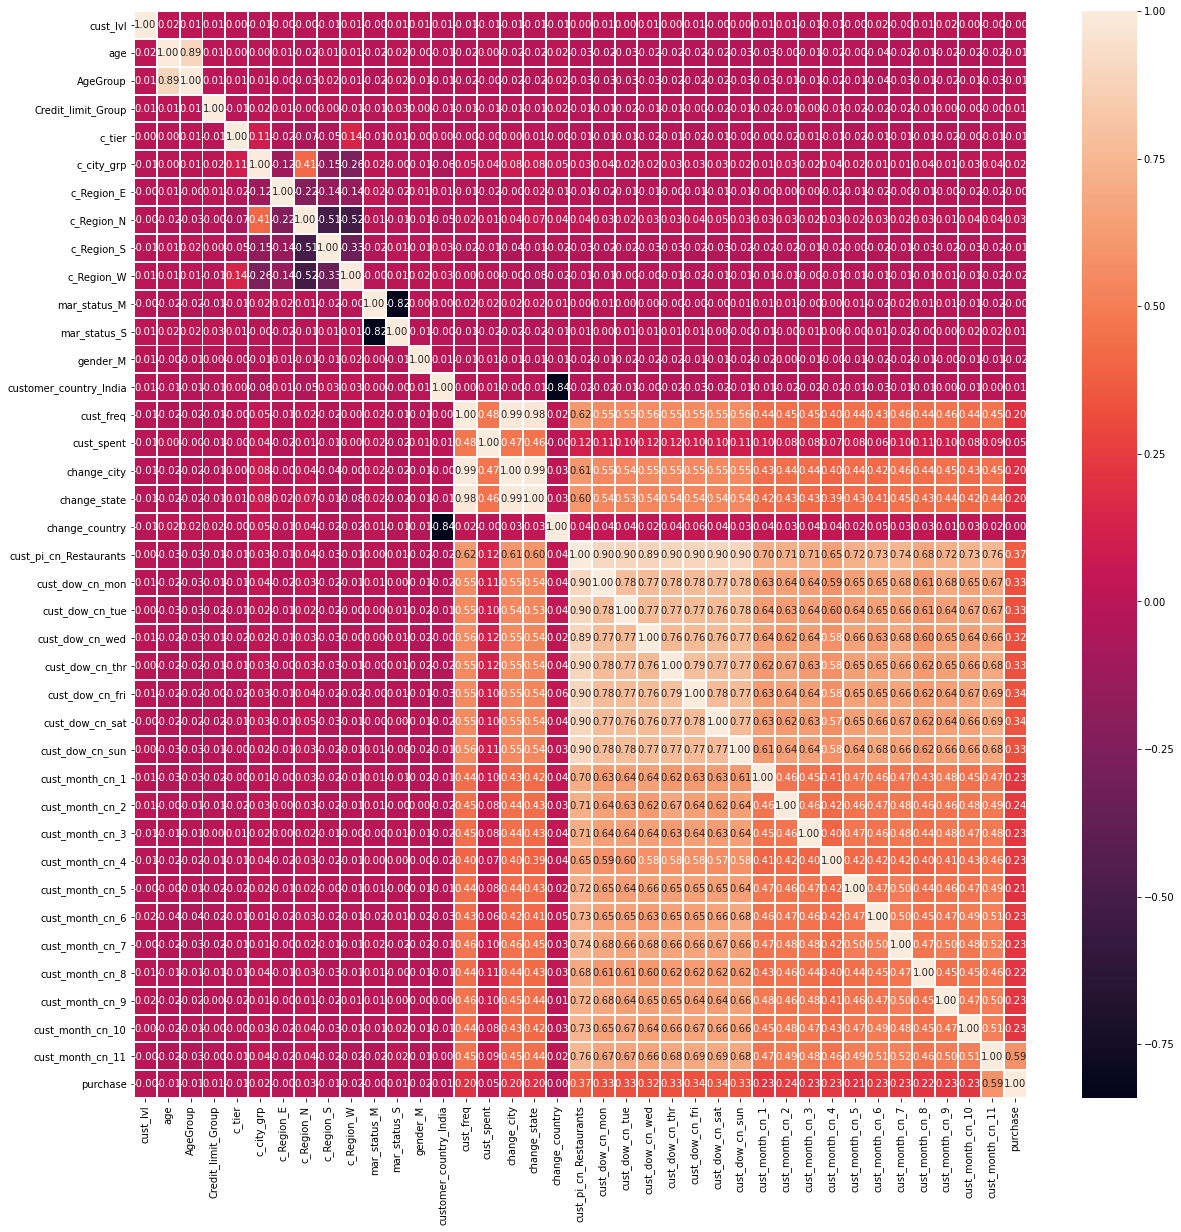

[08:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Restaurants  : XGB Accuracy: 0.7519142419601837


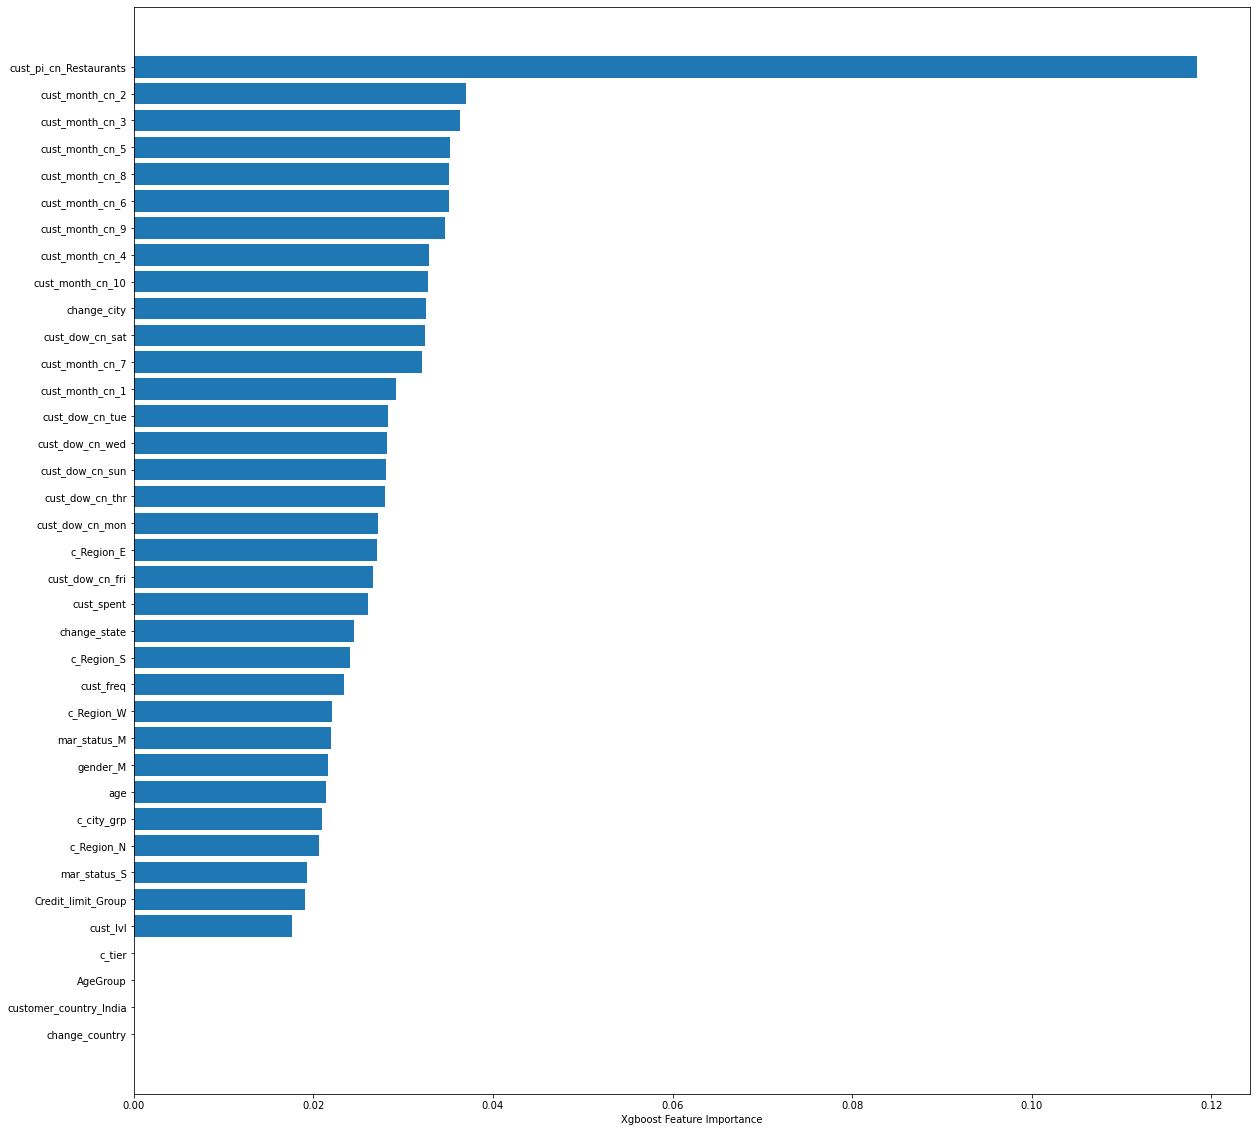

[08:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


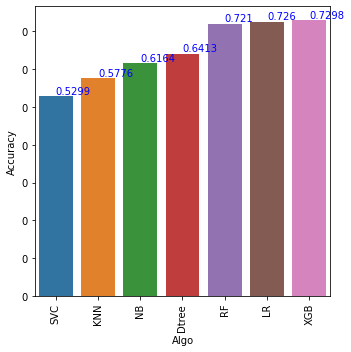

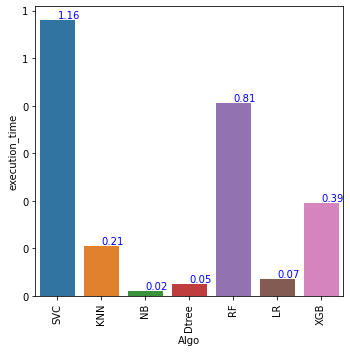

[08:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Retail_Outlet (123744, 54)
df_summdata_cust_pi_cn with size :  (4333, 2)
df_summdata_cust_month_cn with size :  (4333, 12)
df_summdata_cust_dow_cn with size :  (4333, 8)
size before dropping null (9533, 40)
size after dropping null (4333, 40)


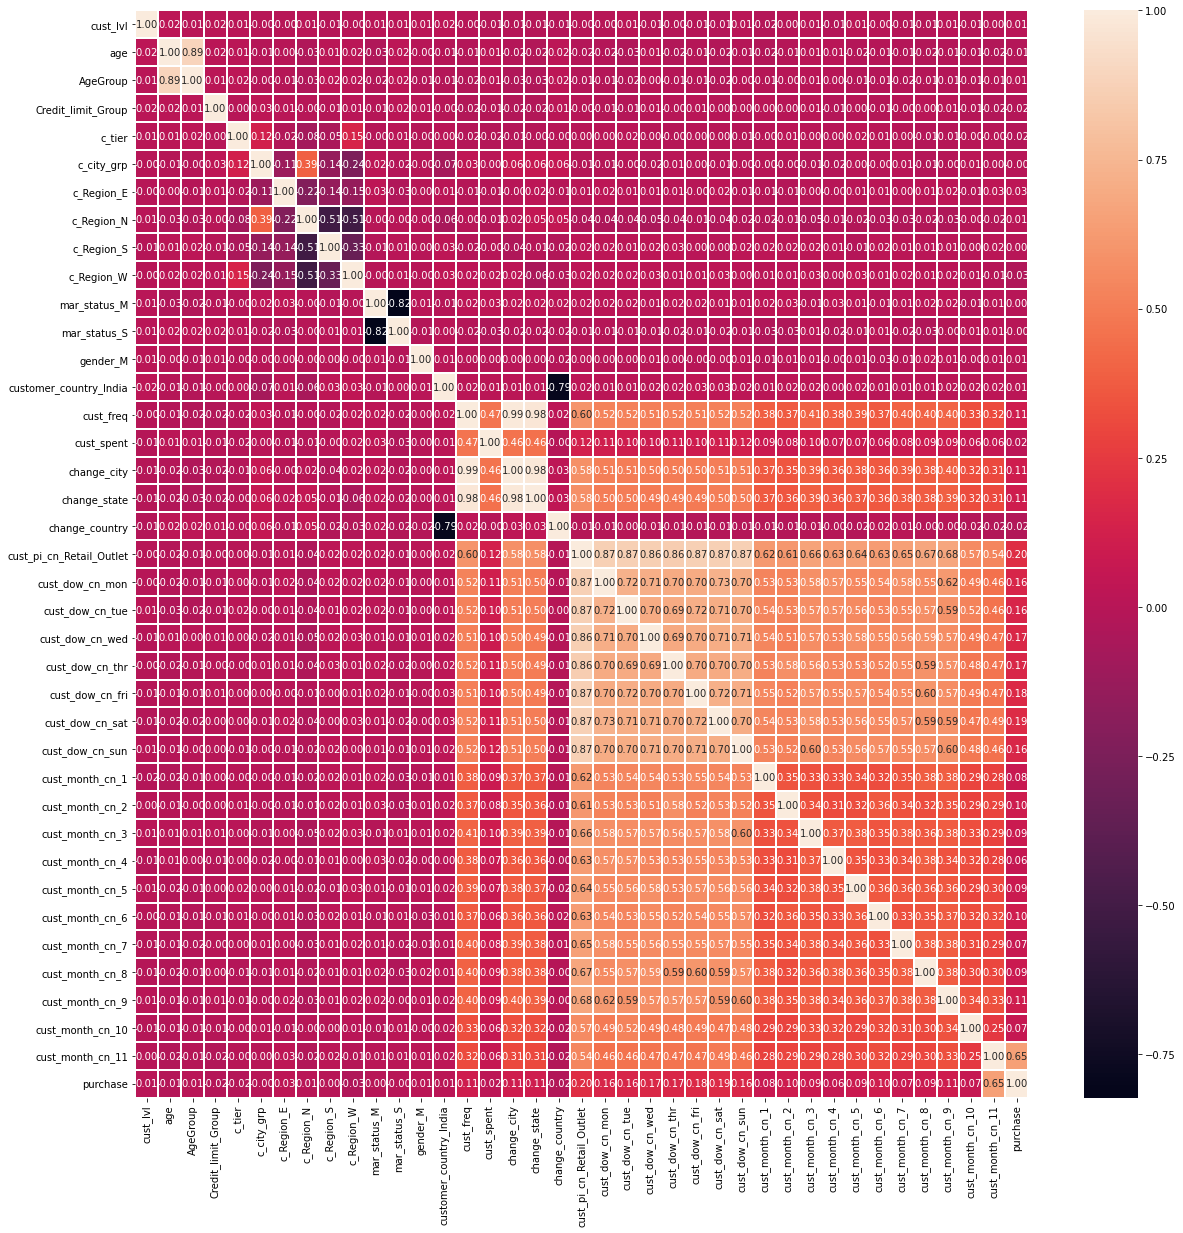

[08:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Retail_Outlet  : XGB Accuracy: 0.6678200692041523


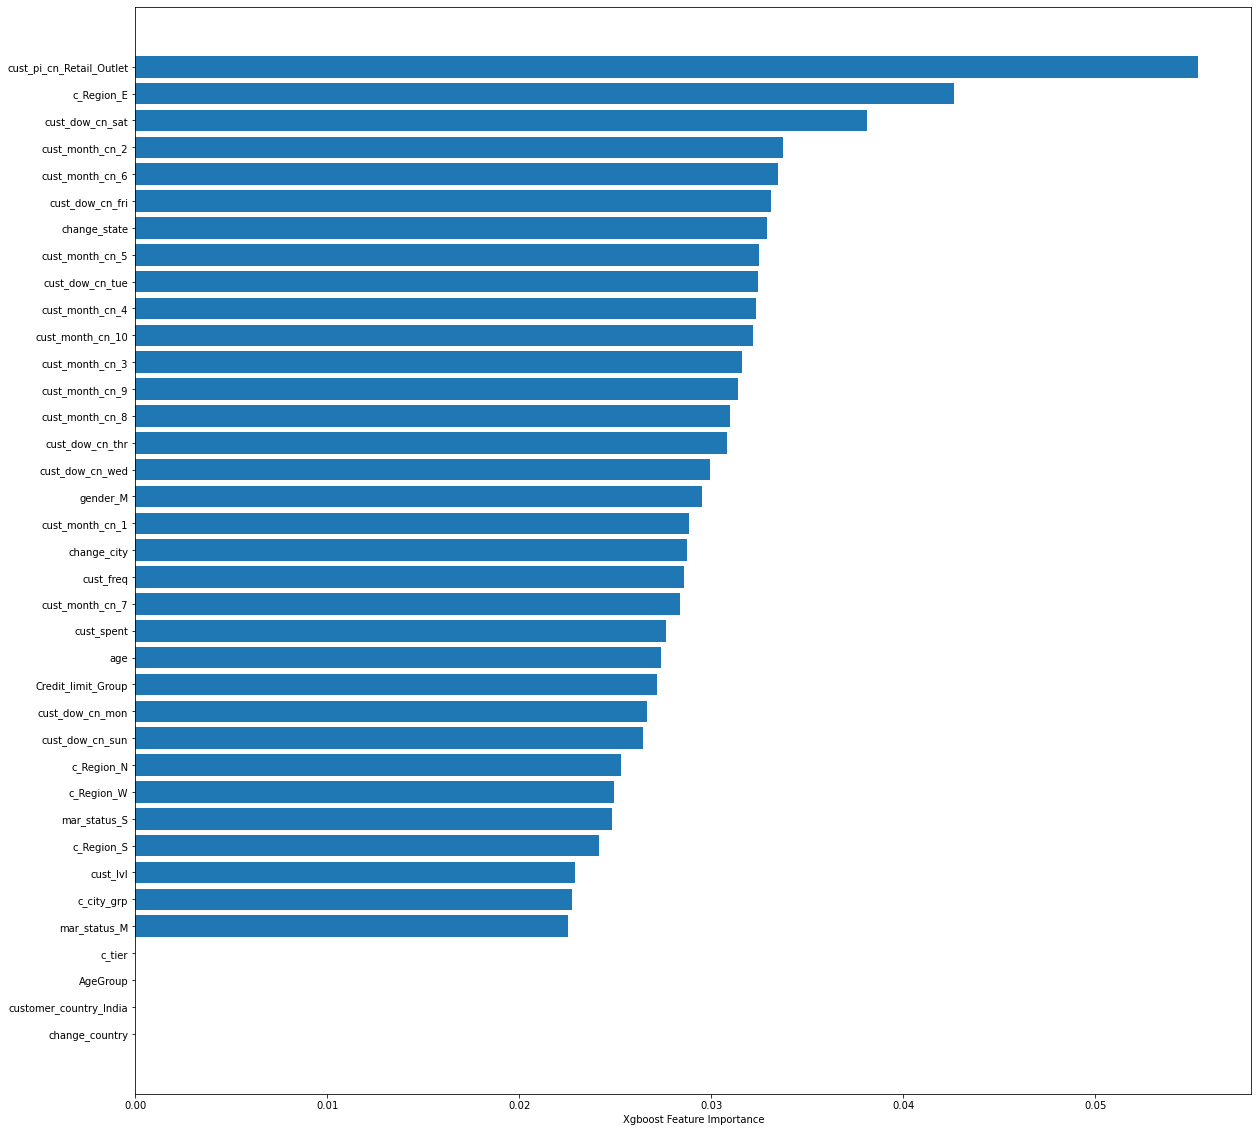

[08:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


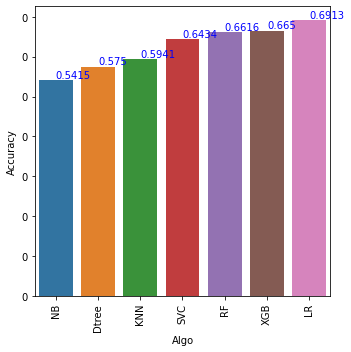

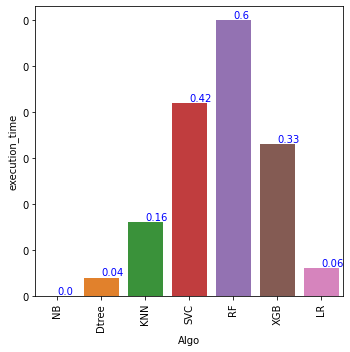

[08:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Household (16312, 54)
df_summdata_cust_pi_cn with size :  (3561, 2)
df_summdata_cust_month_cn with size :  (3561, 12)
df_summdata_cust_dow_cn with size :  (3561, 8)
size before dropping null (9533, 40)
size after dropping null (3561, 40)


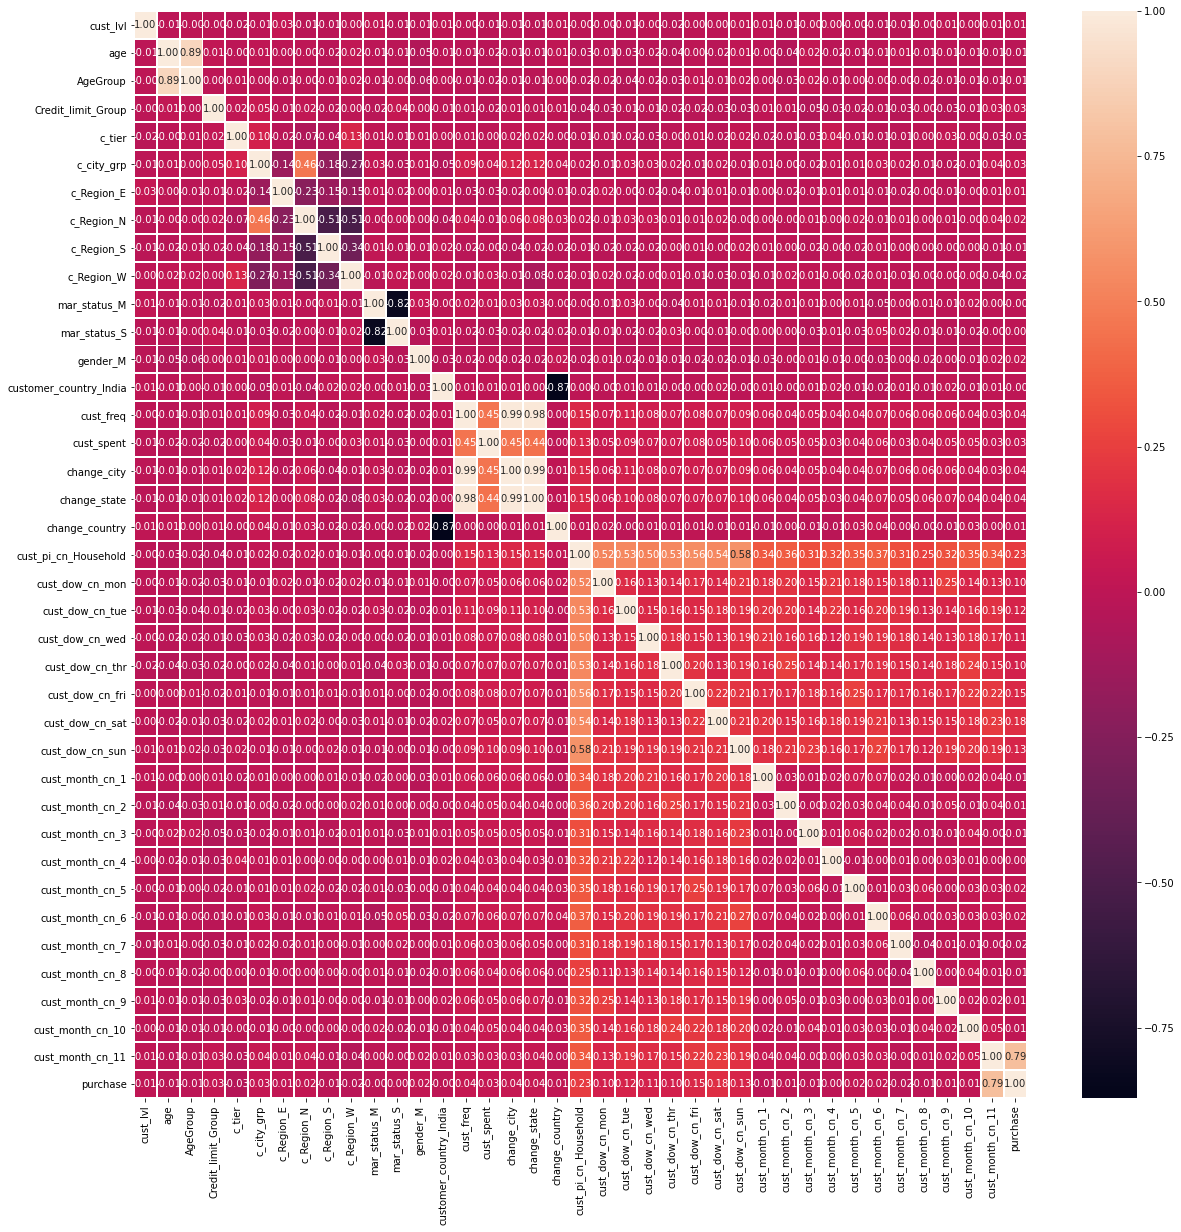

[08:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Household  : XGB Accuracy: 0.8611500701262272


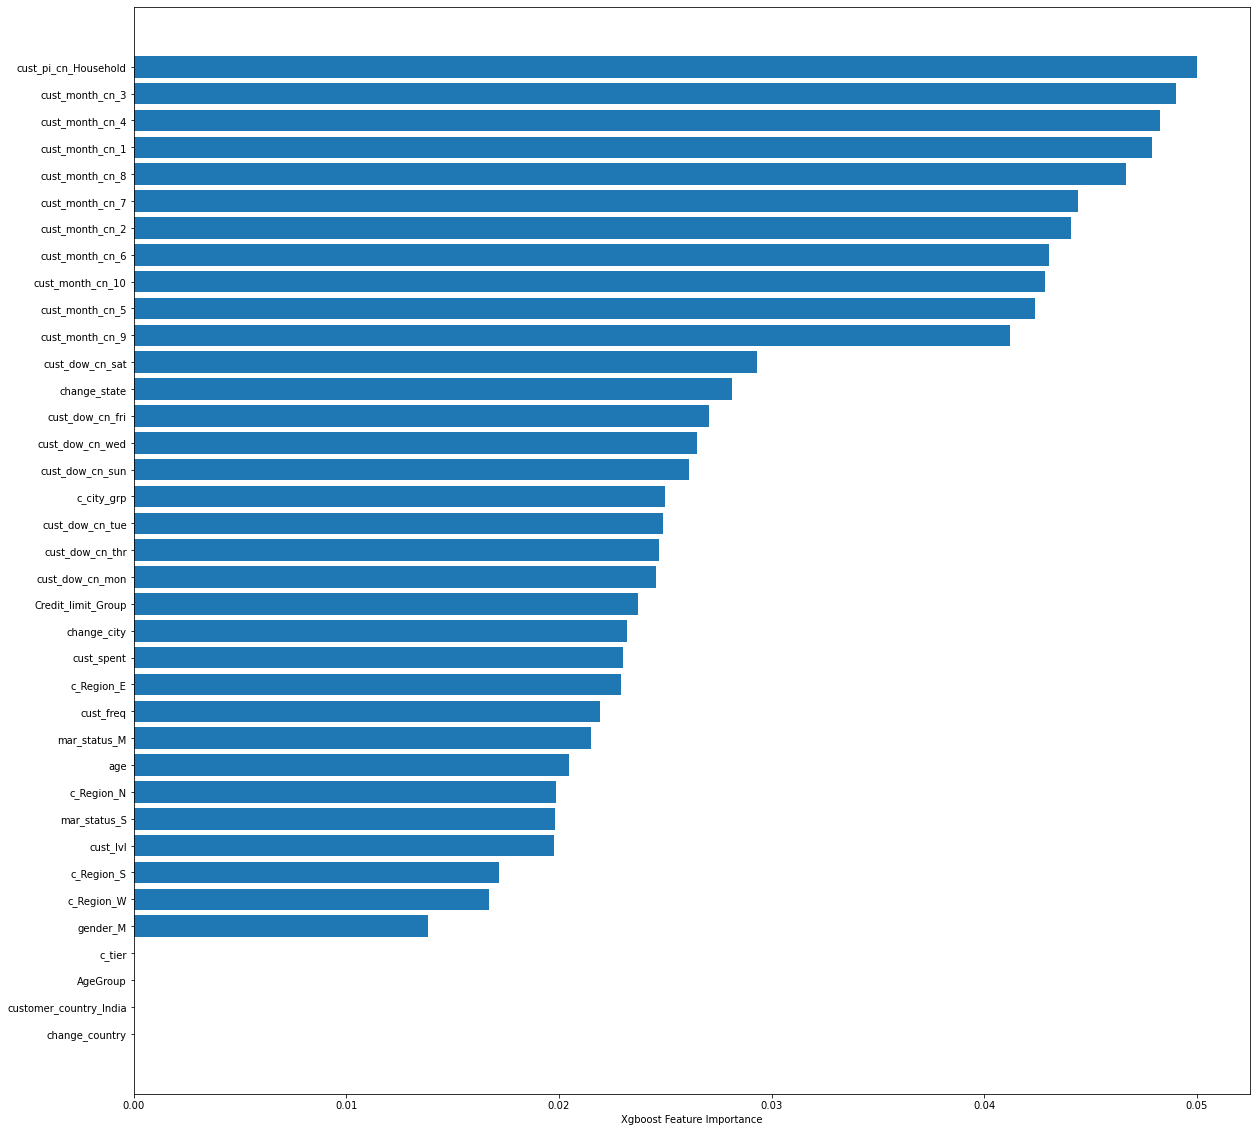

[08:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


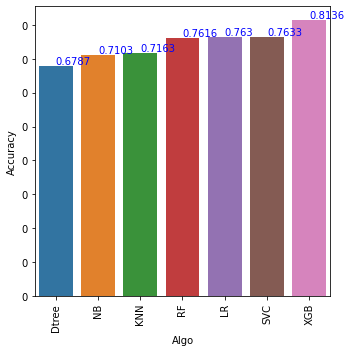

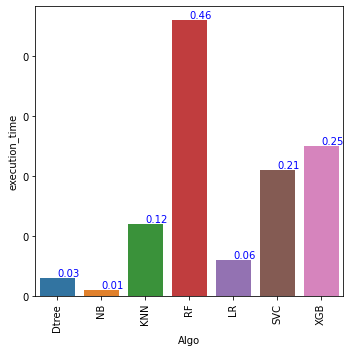

[08:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Art (19374, 54)
df_summdata_cust_pi_cn with size :  (4217, 2)
df_summdata_cust_month_cn with size :  (4217, 12)
df_summdata_cust_dow_cn with size :  (4217, 8)
size before dropping null (9533, 40)
size after dropping null (4217, 40)


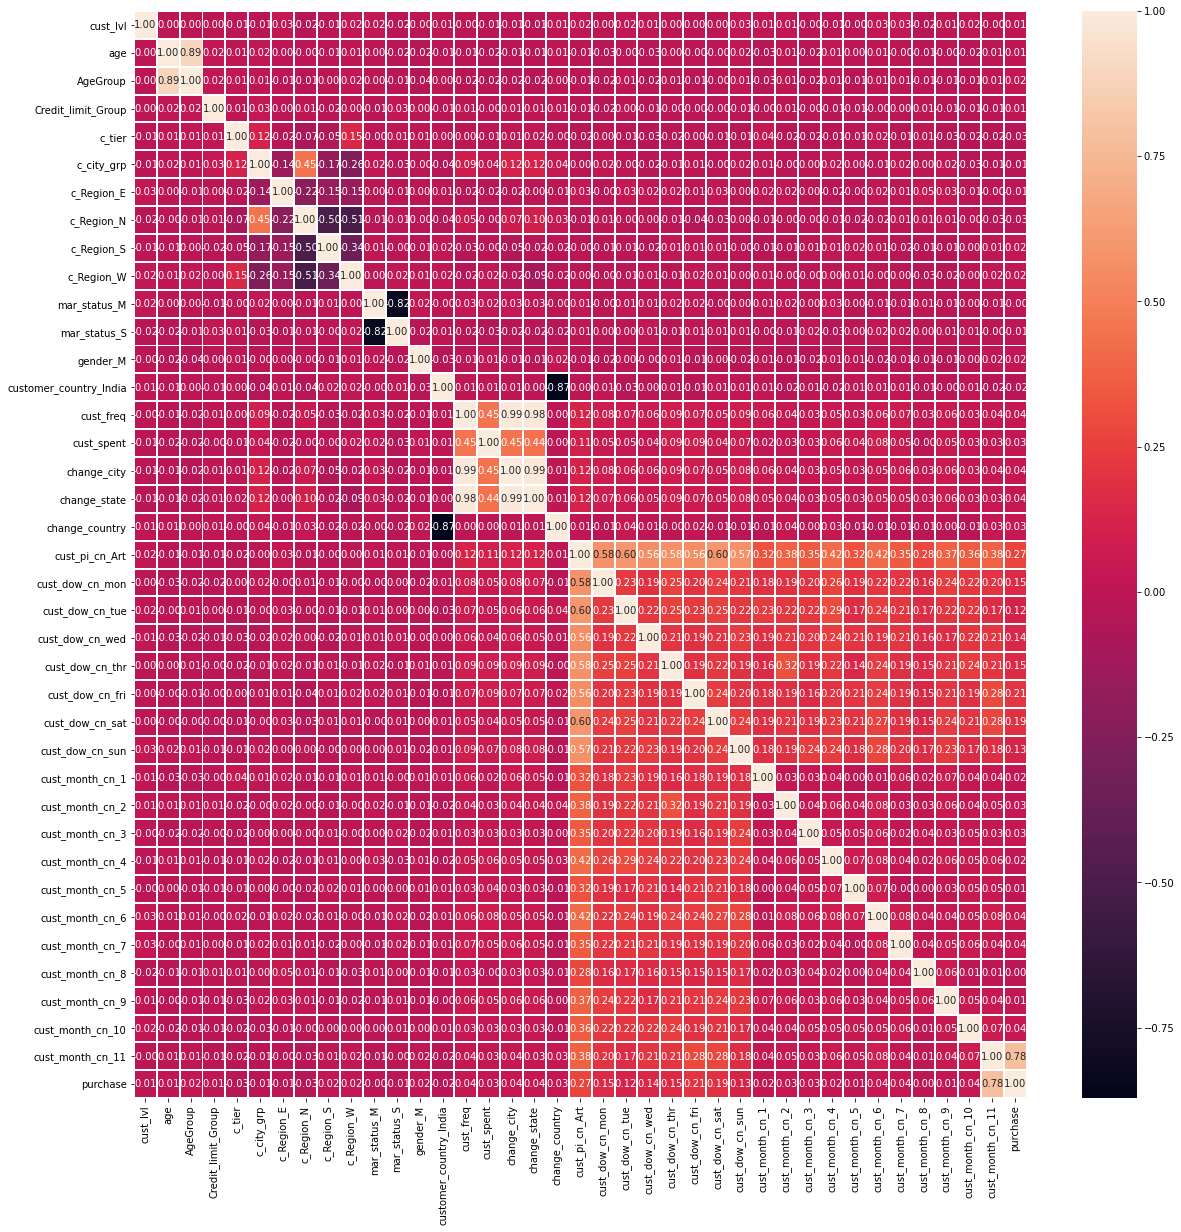

[08:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Art  : XGB Accuracy: 0.8151658767772512


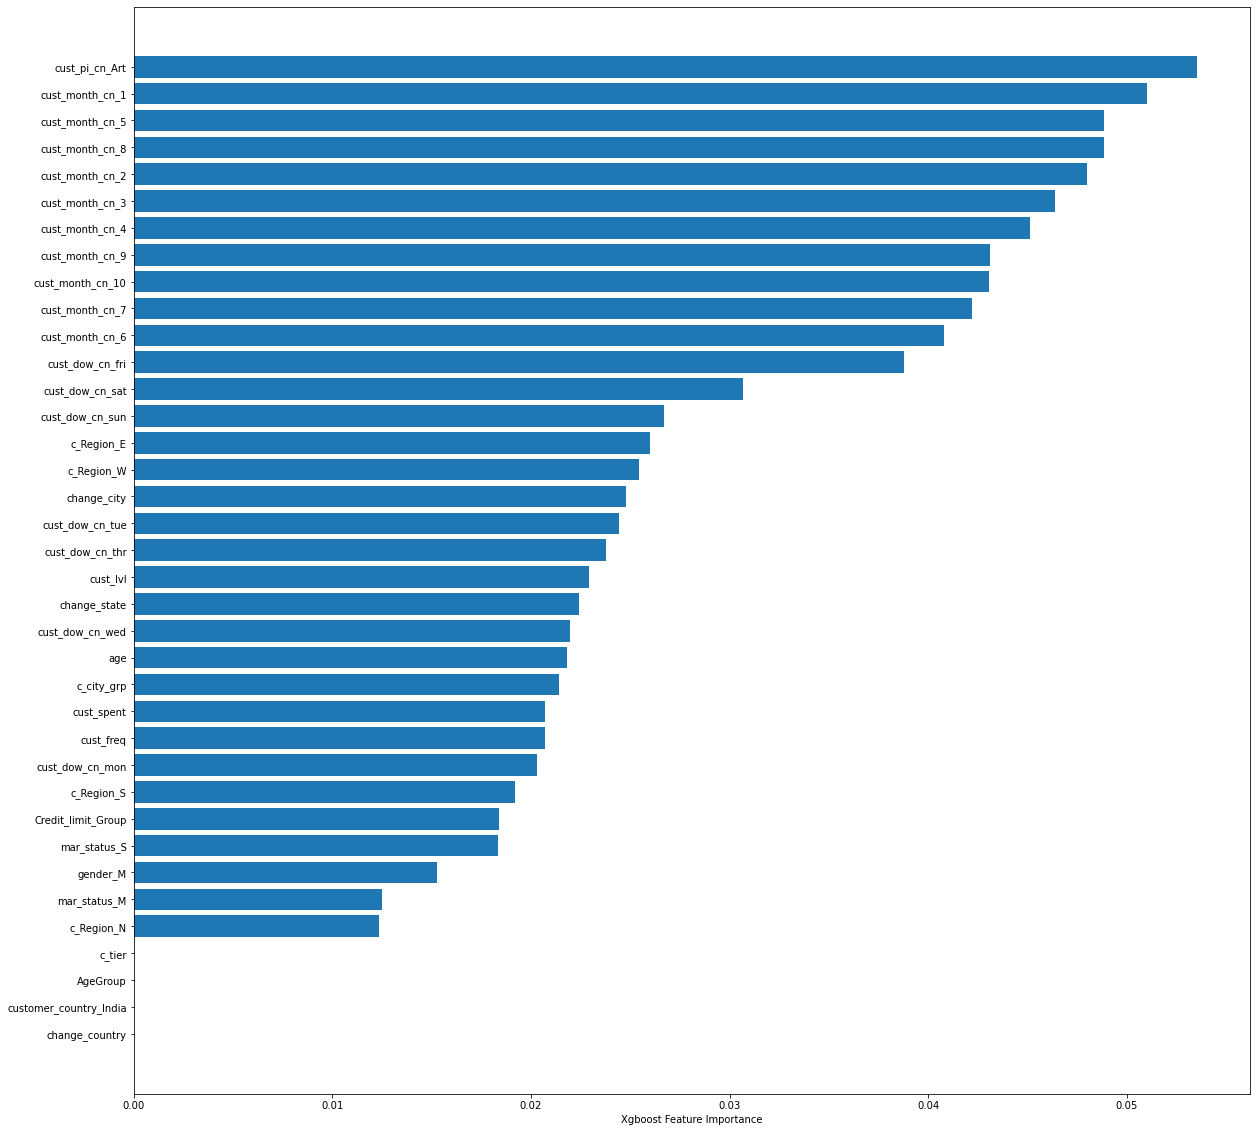

[08:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


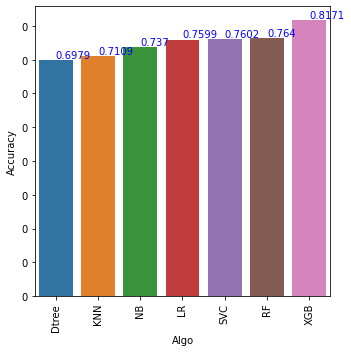

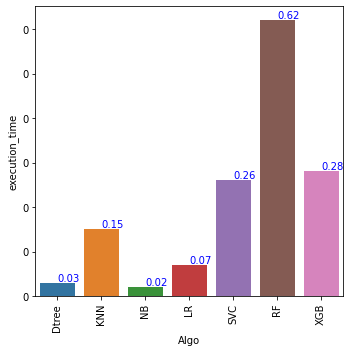

[08:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Airlines (40812, 54)
df_summdata_cust_pi_cn with size :  (3245, 2)
df_summdata_cust_month_cn with size :  (3245, 12)
df_summdata_cust_dow_cn with size :  (3245, 8)
size before dropping null (9533, 40)
size after dropping null (3245, 40)


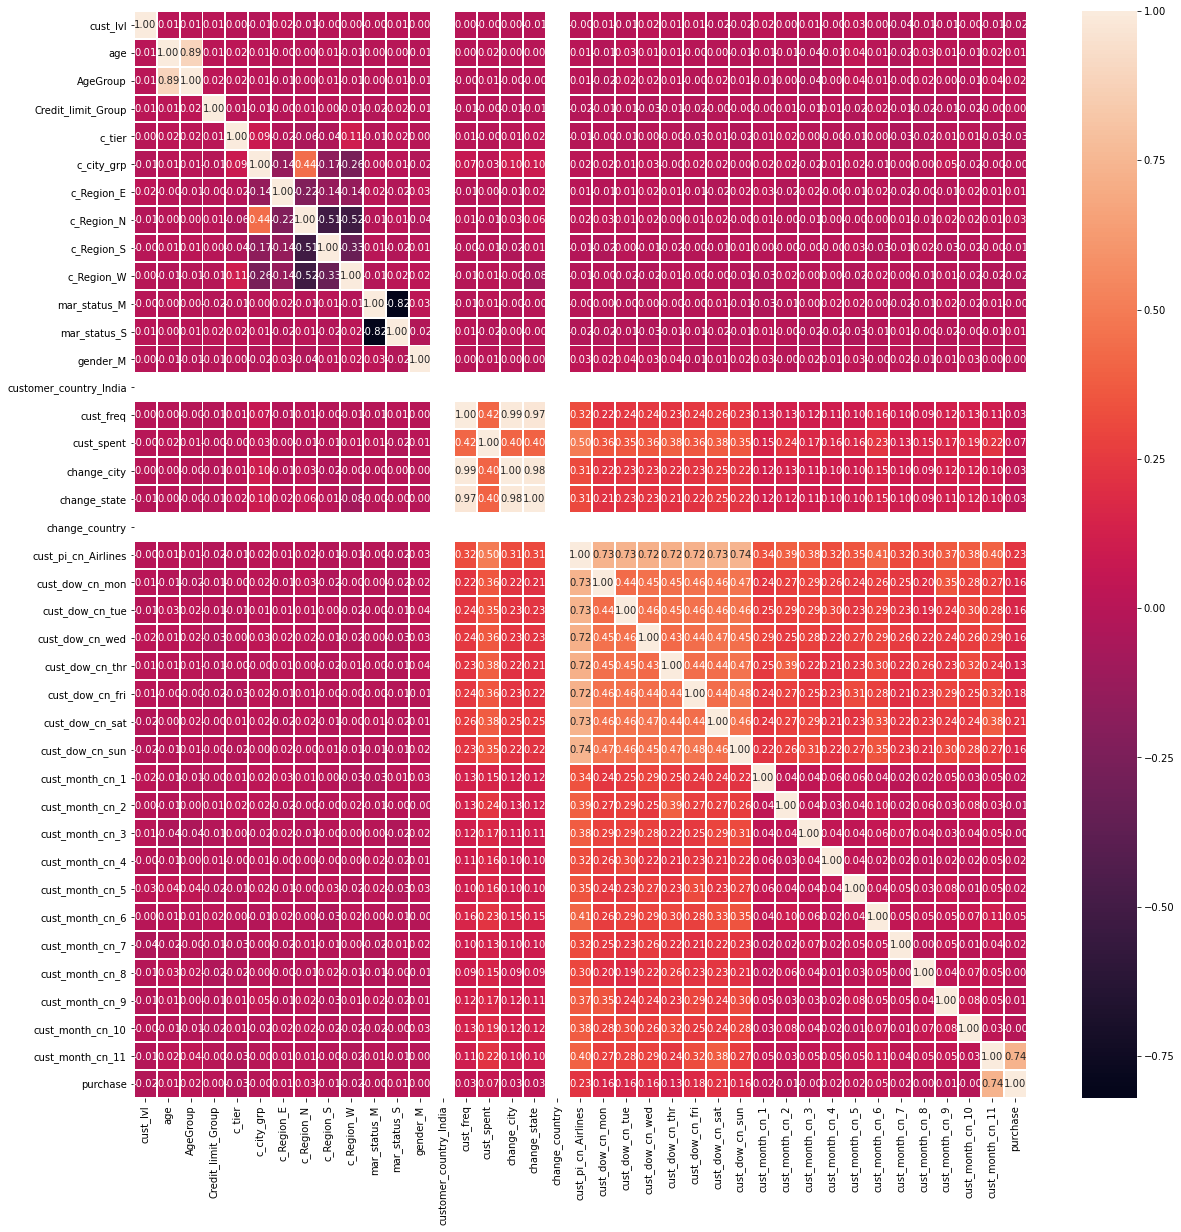

[08:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Airlines  : XGB Accuracy: 0.7750385208012327


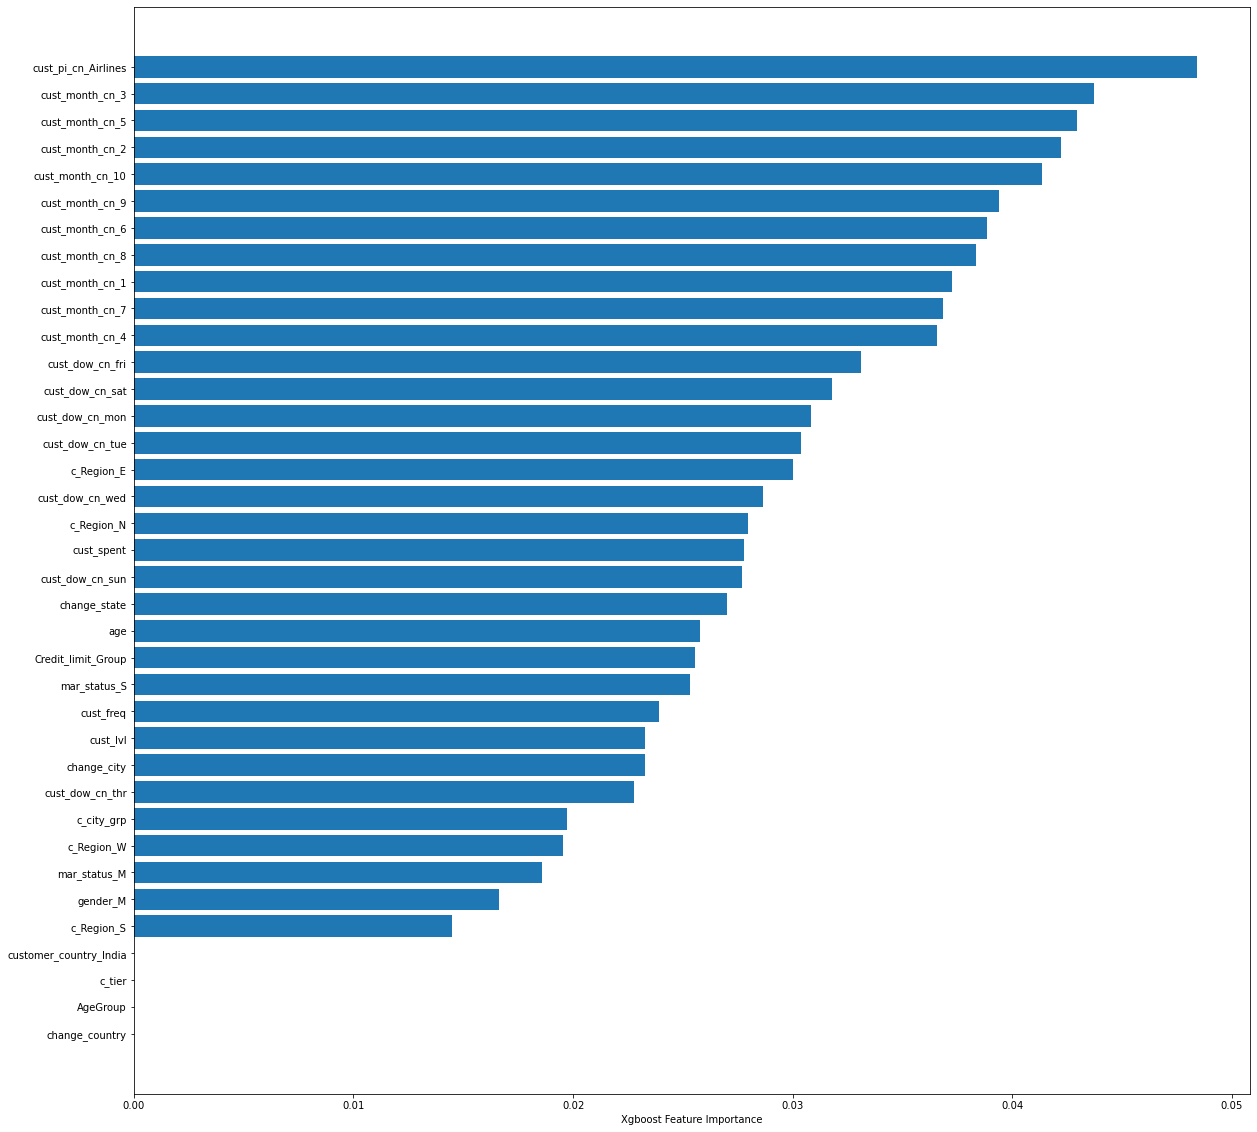

[08:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


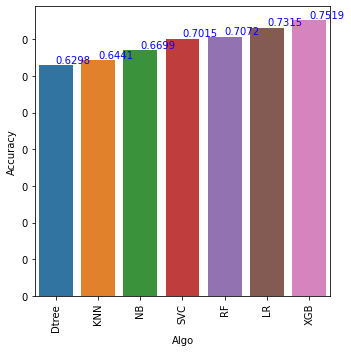

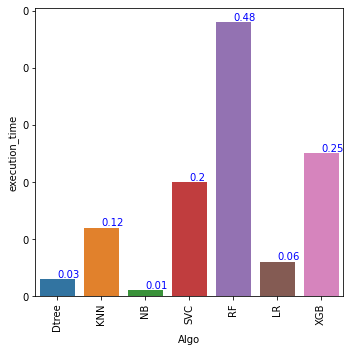

[08:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Lodging (45018, 54)
df_summdata_cust_pi_cn with size :  (3291, 2)
df_summdata_cust_month_cn with size :  (3291, 12)
df_summdata_cust_dow_cn with size :  (3291, 8)
size before dropping null (9533, 40)
size after dropping null (3291, 40)


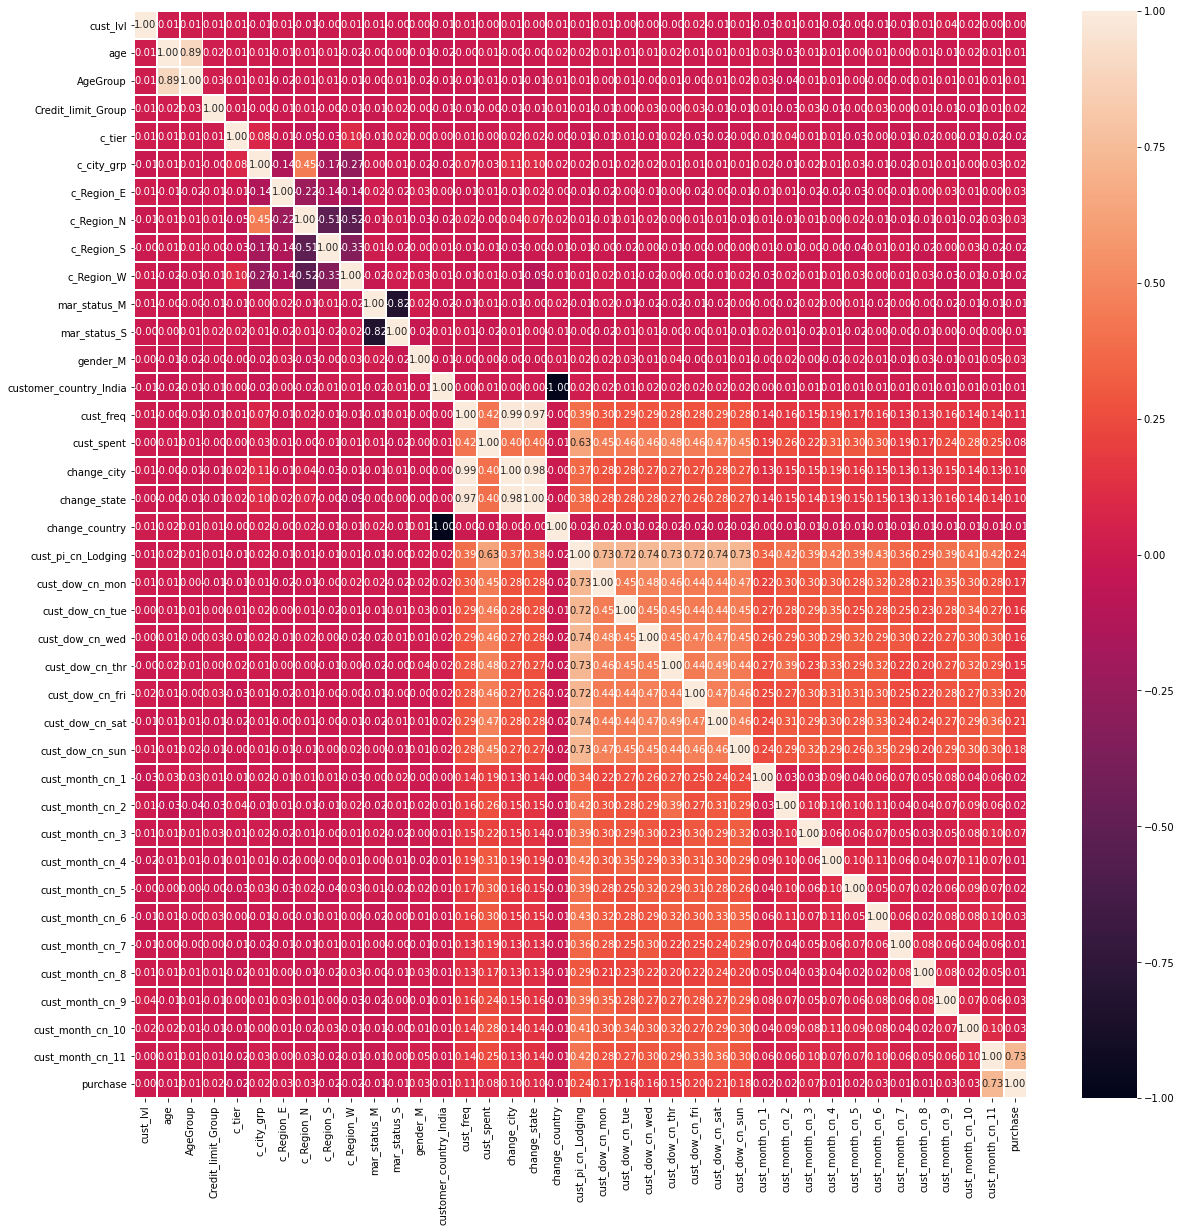

[08:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Lodging  : XGB Accuracy: 0.7511380880121397


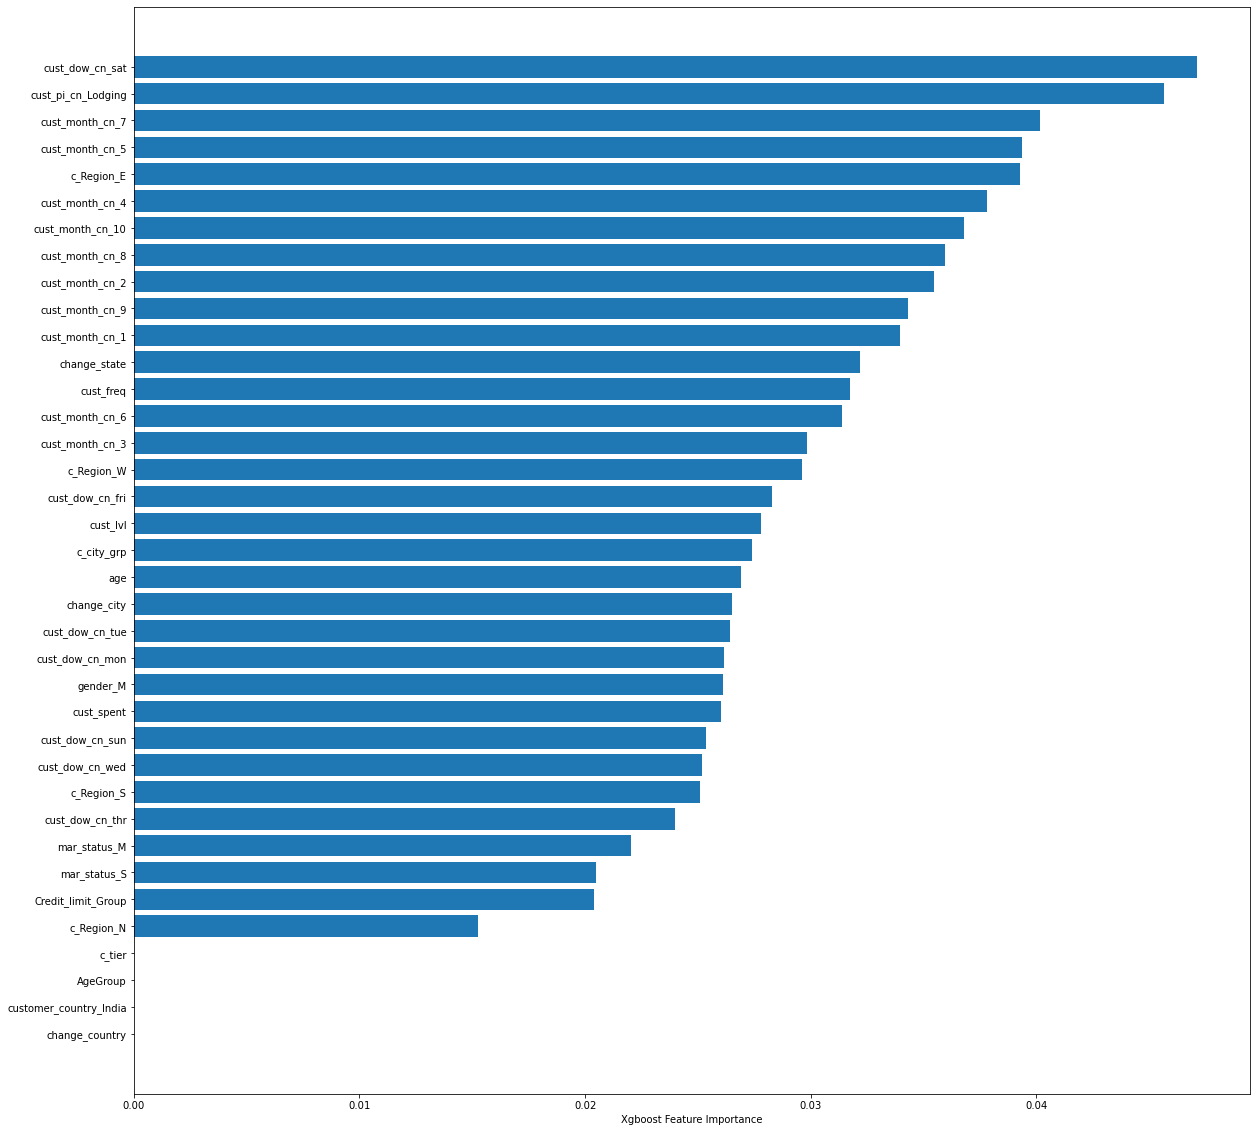

[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


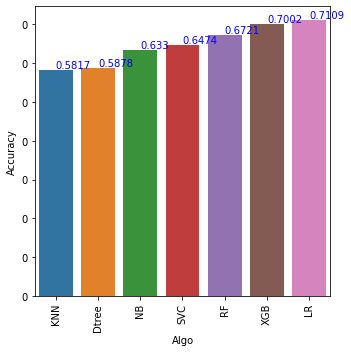

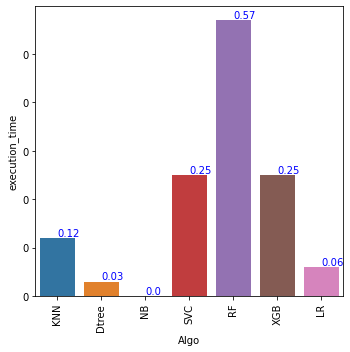

[08:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Size of df Clothing (47610, 54)
df_summdata_cust_pi_cn with size :  (3227, 2)
df_summdata_cust_month_cn with size :  (3227, 12)
df_summdata_cust_dow_cn with size :  (3227, 8)
size before dropping null (9533, 40)
size after dropping null (3227, 40)


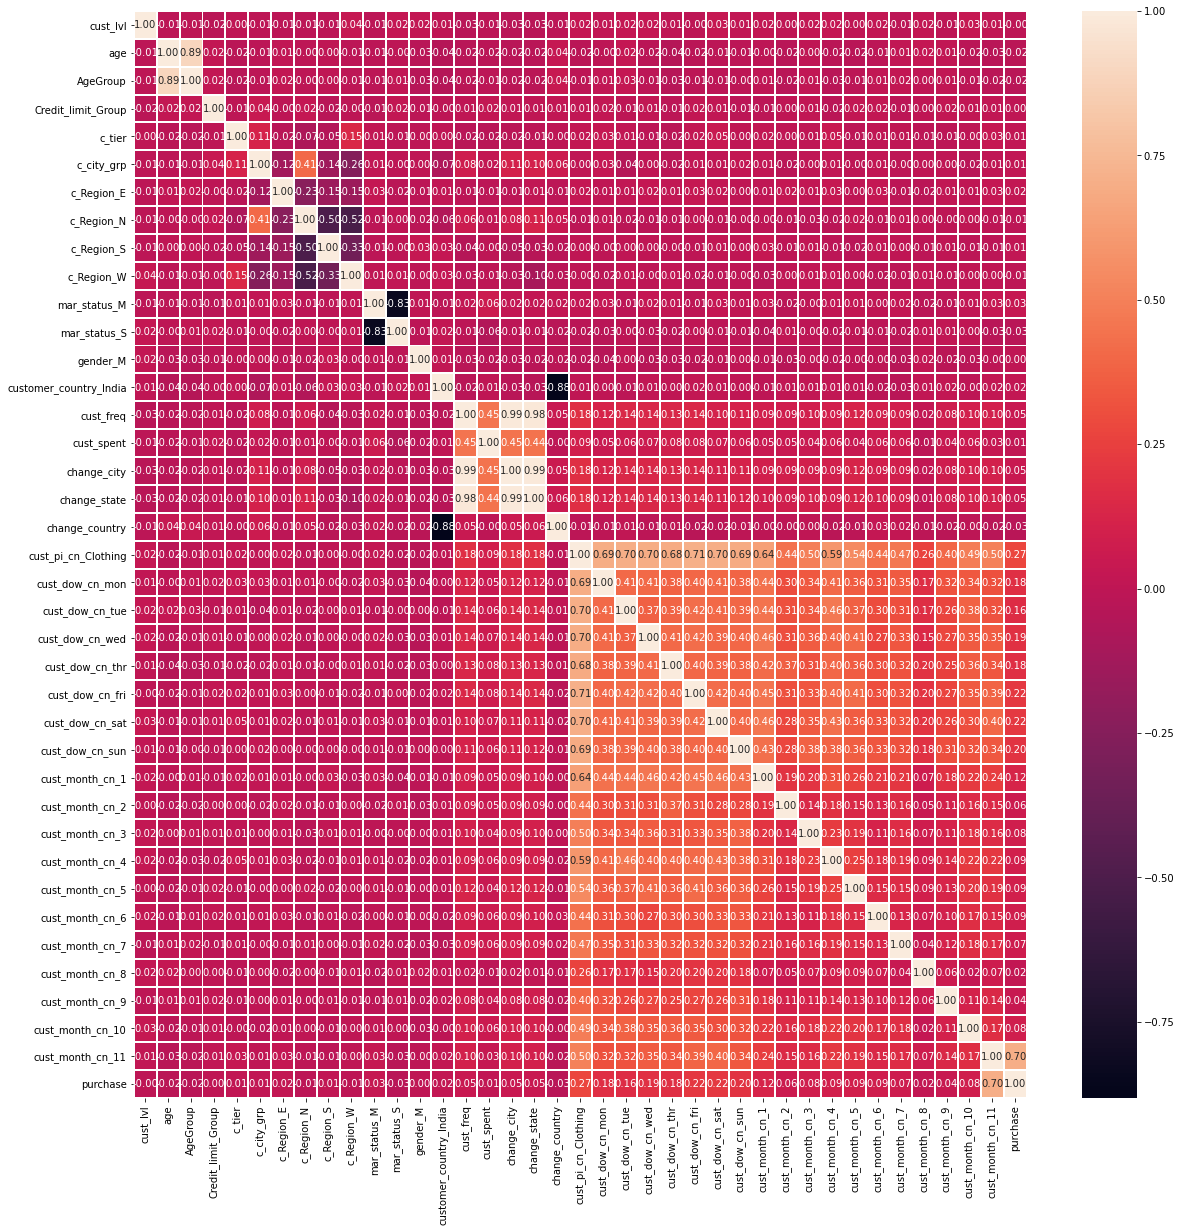

[08:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Clothing  : XGB Accuracy: 0.6764705882352942


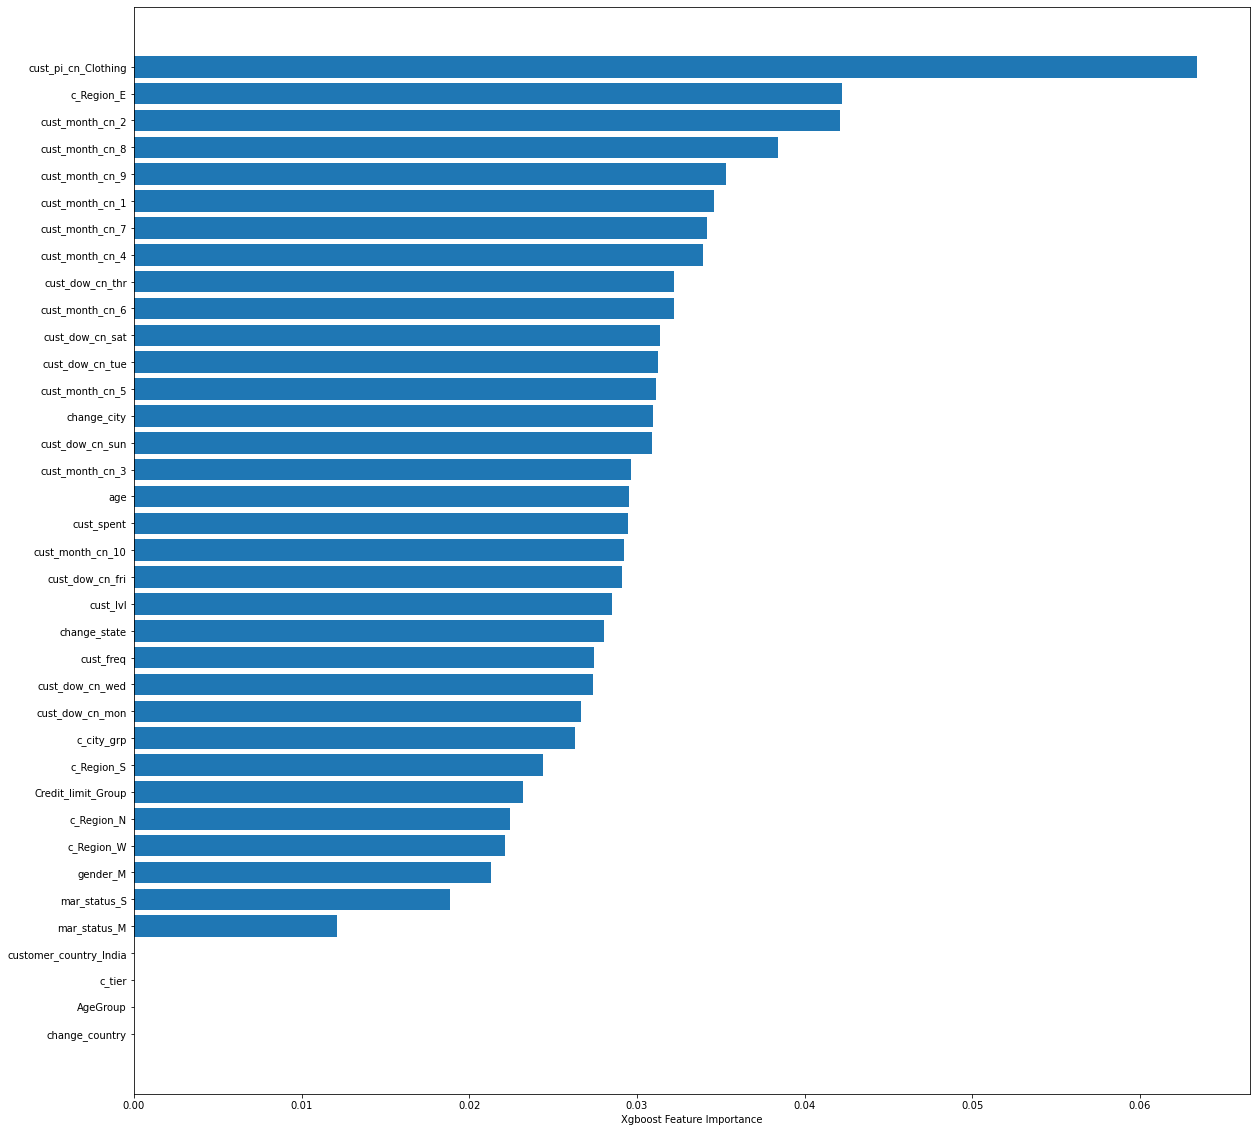

[08:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


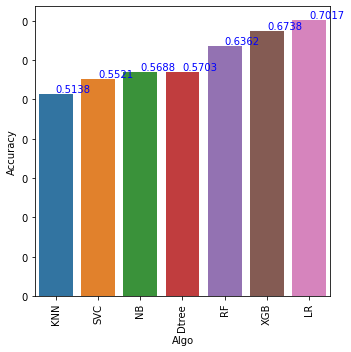

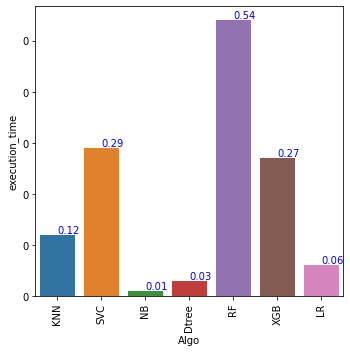

[08:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:46:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Purchase preference Model Generated for all the purchase Interests


In [15]:
pi = base2.purchase_interest.unique()
for x in pi:
    df_basedata_pp = base2[base2['purchase_interest'].isin([x])]
    print('Size of df',x,df_basedata_pp.shape)
    #Restaurant

    df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'purchase_interest']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='purchase_interest', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
    df_summdata_cust_pi_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.add_prefix('cust_pi_cn_')
    print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_pi_cn.shape)


    df_basedata_9_month_cn = df_basedata_pp.groupby(['customer_id', 'transaction_month']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_month_cn = pd.pivot_table(df_basedata_9_month_cn, index='customer_id', columns='transaction_month', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_month_cn.columns = df_summdata_cust_month_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_month_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_month_cn = df_summdata_cust_month_cn.reset_index()                #index to columns
    df_summdata_cust_month_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_month_cn = df_summdata_cust_month_cn.add_prefix('cust_month_cn_')
    print("df_summdata_cust_month_cn with size : ", df_summdata_cust_month_cn.shape)


    df_basedata_9_dow_cn = df_basedata_pp.groupby(['customer_id', 'transaction_dayofweek']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_dow_cn = pd.pivot_table(df_basedata_9_dow_cn, index='customer_id', columns='transaction_dayofweek', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_dow_cn.columns = df_summdata_cust_dow_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_dow_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.reset_index()                #index to columns
    df_summdata_cust_dow_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.add_prefix('cust_dow_cn_')
    # Rename 
    df_summdata_cust_dow_cn.rename(columns={"cust_dow_cn_0": "cust_dow_cn_mon", "cust_dow_cn_1": "cust_dow_cn_tue", "cust_dow_cn_2": "cust_dow_cn_wed", "cust_dow_cn_3": "cust_dow_cn_thr", "cust_dow_cn_4": "cust_dow_cn_fri", "cust_dow_cn_5": "cust_dow_cn_sat", "cust_dow_cn_6": "cust_dow_cn_sun"}, inplace = True)

    print("df_summdata_cust_dow_cn with size : ", df_summdata_cust_dow_cn.shape)


    # Merge 
    summ1_pp = pd.merge(customer_demographic, df_cust_freq_spent, left_on=['customer_id'], right_on=['customer_id'], how='left')
    summ2_pp = pd.merge(summ1_pp, df_cust_loc_change, left_on=['customer_id'], right_on=['customer_id'], how='left')


    summ3_pp = pd.merge(summ2_pp, df_summdata_cust_pi_cn, left_on=['customer_id'], right_on=['cust_pi_cn_customer_id'], how='left')

    summ4_pp = pd.merge(summ3_pp, df_summdata_cust_dow_cn, left_on=['customer_id'], right_on=['cust_dow_cn_customer_id'], how='left')

    summ5_pp1 = pd.merge(summ4_pp, df_summdata_cust_month_cn, left_on=['customer_id'], right_on=['cust_month_cn_customer_id'], how='left')



    # Drop Columns from right side

    summ5_pp1.drop(['cust_pi_cn_customer_id','cust_month_cn_customer_id', 'cust_dow_cn_customer_id'], axis=1, inplace=True)


    summ5_pp1['purchase'] = np.where(summ5_pp1['cust_month_cn_11'] > 0, 1, 0)

    print("size before dropping null", summ5_pp1.shape)
    ## using dropna() function  
    summ5_pp = summ5_pp1.dropna()
    print("size after dropping null", summ5_pp.shape)
    
    
# EDA


    df_basedata_train_1 = summ5_pp.copy()
    df_basedata_train_1.drop(['customer_id'], axis=1, inplace=True)

    f,ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(df_basedata_train_1.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax)
    plt.show()




    from sklearn.model_selection import train_test_split, cross_val_score

    summ5_pp1 = summ5_pp.copy()
    # drop unique
    summ5_pp1.drop(['customer_id','cust_month_cn_11'], axis=1, inplace=True)

    modeling_data = summ5_pp1

    X = modeling_data.drop("purchase", axis=1)
    y = modeling_data["purchase"]

    # Split data to 80% training data and 20% of test to check the accuracy of our model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    from xgboost import XGBClassifier
    from sklearn.metrics import mean_squared_error as MSE
    # define model
    model = XGBClassifier()
    model.fit(X_train,y_train)

    # Predict the model
    y_pred = model.predict(X_test)
  
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print(x, " : XGB Accuracy:",metrics.accuracy_score(y_test, y_pred))

    fig, ax = plt.subplots(figsize=(20,20))
    sorted_idx = model.feature_importances_.argsort()
    plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.xlabel("Xgboost Feature Importance")
    plt.show()
    
    
        # Split data to 80% training data and 20% of test to check the accuracy of our model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


    from sklearn.svm import SVC
    from sklearn.multioutput import MultiOutputClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    import xgboost as xgb
    from sklearn.model_selection import KFold, cross_val_score, train_test_split
    import time

    #create an array of models
    models = []
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("RF",RandomForestClassifier()))
    models.append(("SVC",SVC()))
    models.append(("Dtree",DecisionTreeClassifier()))
    models.append(("XGB",xgb.XGBClassifier()))
    models.append(("KNN",KNeighborsClassifier()))

    result = []
    #measure the accuracy 
    for name,model in models:
        start_time = time.time()
        kfold = KFold(n_splits=2, random_state=22)
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
        execution_time = (time.time() - start_time)
        result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))


    pd.DataFrame(result)

    dfa = pd.DataFrame(result, columns =['Algo', 'Accuracy', 'execution_time']) 
    dfa 

    # sort df by Count column
    pd_df = dfa.sort_values(['Accuracy']).reset_index(drop=True)
    #print (pd_df)


    plt.figure(figsize=(5,5))
    # plot bar chart with index as x values
    ax = sns.barplot(pd_df.index, pd_df.Accuracy)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set(xlabel="Algo", ylabel="Accuracy")
    # add proper Dim values as x labels

    ax.set_xticklabels(pd_df.Algo)
    for item in ax.get_xticklabels(): item.set_rotation(90)
    for i, v in enumerate(pd_df["Accuracy"].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5,5))
    # plot bar chart with index as x values
    ax = sns.barplot(pd_df.index, pd_df.execution_time)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    ax.set(xlabel="Algo", ylabel="execution_time")
    # add proper Dim values as x labels

    ax.set_xticklabels(pd_df.Algo)
    for item in ax.get_xticklabels(): item.set_rotation(90)
    for i, v in enumerate(pd_df["execution_time"].iteritems()):        
        ax.text(i ,v[1], "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
    plt.tight_layout()
    plt.show()




    #create an array of models
    models = []
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("RF",RandomForestClassifier()))
    models.append(("SVC",SVC()))
    models.append(("Dtree",DecisionTreeClassifier()))
    models.append(("XGB",xgb.XGBClassifier()))
    models.append(("KNN",KNeighborsClassifier()))

    result = []
    #measure the accuracy 
    for name,model in models:
        start_time = time.time()
        kfold = KFold(n_splits=2, random_state=22)
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "f1")
        execution_time = (time.time() - start_time)
        result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))

    pd.DataFrame(result)

    dff = pd.DataFrame(result, columns =['Algo', 'f1', 'execution_time']) 
    dff 

    # sort df by Count column
    pd_df_f = dff.sort_values(['f1']).reset_index(drop=True)
    #print (pd_df_f)



    #create an array of models
    models = []
    models.append(("LR",LogisticRegression()))
    models.append(("NB",GaussianNB()))
    models.append(("RF",RandomForestClassifier()))
    models.append(("SVC",SVC()))
    models.append(("Dtree",DecisionTreeClassifier()))
    models.append(("XGB",xgb.XGBClassifier()))
    models.append(("KNN",KNeighborsClassifier()))

    result = []
    #measure the accuracy 
    for name,model in models:
        start_time = time.time()
        kfold = KFold(n_splits=2, random_state=22)
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "roc_auc")
        execution_time = (time.time() - start_time)
        result.append((name,round(cv_result.mean(),4), round(execution_time,2) ))


    pd.DataFrame(result)

    dfr = pd.DataFrame(result, columns =['Algo', 'roc_auc', 'execution_time']) 
    dfr 

    # sort df by Count column
    pd_df_r = dfr.sort_values(['roc_auc']).reset_index(drop=True)
    #print (pd_df_r)



    # Merge 
    pd_df1 = pd_df.copy()
    pd_df1.drop(['execution_time'], axis=1, inplace=True)

    pd_df_f1 = pd_df_f.copy()
    pd_df_f1.drop(['execution_time'], axis=1, inplace=True)

    pd_df_r1 = pd_df_r.copy()
    pd_df_r1.drop(['execution_time'], axis=1, inplace=True)


    result1_pp = pd.merge(pd_df1, pd_df_f1, left_on=['Algo'], right_on=['Algo'], how='left')
    result2_pp = pd.merge(result1_pp, pd_df_r1, left_on=['Algo'], right_on=['Algo'], how='left')
    print('Results for ', x)
    print(result2_pp)
    result2_pp.head(10)

    # Rename 
    pd_df1.rename(columns={"Accuracy": "Performance"}, inplace = True)
    pd_df_f1.rename(columns={"f1": "Performance"}, inplace = True)
    pd_df_r1.rename(columns={"roc_auc": "Performance"}, inplace = True)

    pd_df1['metric'] = 'Accuracy'
    pd_df_f1['metric'] = 'F1'
    pd_df_r1['metric'] = 'ROC'

    df_performance1 = pd_df1

    df_performance2 = df_performance1.append(pd_df_f1)

    df_performance = df_performance2.append(pd_df_r1)
    df_performance
    df_performance = df_performance.sort_values(["Algo","metric"], ascending = (True, True))

    #sns.lineplot(data=df_performance, x="Algo", y="Performance", hue = 'metric')

    import plotly.express as px

    df = df_performance
    fig = px.line(df, x="Algo", y="Performance", color = 'metric')

    fig.show()

print('Purchase preference Model Generated for all the purchase Interests')

In [66]:
#df_basedata_pp1 = base2[base2['purchase_interest'].isin(['Restaurants'])]
#df_basedata_pp1.info()

#Restaurant
df_basedata_pp = base2[base2['purchase_interest'].isin(['Restaurants'])]


df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'purchase_interest']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='purchase_interest', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
df_summdata_cust_pi_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.add_prefix('cust_pi_cn_')
print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_pi_cn.shape)


df_basedata_9_month_cn = df_basedata_pp.groupby(['customer_id', 'transaction_month']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_month_cn = pd.pivot_table(df_basedata_9_month_cn, index='customer_id', columns='transaction_month', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_month_cn.columns = df_summdata_cust_month_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_month_cn.columns.name = None               #remove mcc_code
df_summdata_cust_month_cn = df_summdata_cust_month_cn.reset_index()                #index to columns
df_summdata_cust_month_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_month_cn = df_summdata_cust_month_cn.add_prefix('cust_month_cn_')
print("df_summdata_cust_month_cn with size : ", df_summdata_cust_month_cn.shape)


df_basedata_9_dow_cn = df_basedata_pp.groupby(['customer_id', 'transaction_dayofweek']).count()[['tran_amount']].reset_index()

# Convert the running list of user ratings into a matrix using the 'pivot table' function
df_summdata_cust_dow_cn = pd.pivot_table(df_basedata_9_dow_cn, index='customer_id', columns='transaction_dayofweek', aggfunc=np.sum, fill_value=0)

# Reset Index
df_summdata_cust_dow_cn.columns = df_summdata_cust_dow_cn.columns.droplevel(0) #remove tran_amount
df_summdata_cust_dow_cn.columns.name = None               #remove mcc_code
df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.reset_index()                #index to columns
# Rename 
df_summdata_cust_dow_cn.rename(columns={"cust_dow_cn_0": "cust_dow_cn_mon", "cust_dow_cn_1": "cust_dow_cn_tue", "cust_dow_cn_2": "cust_dow_cn_wed", "cust_dow_cn_3": "cust_dow_cn_thr", "cust_dow_cn_4": "cust_dow_cn_fri", "cust_dow_cn_5": "cust_dow_cn_sat", "cust_dow_cn_6": "cust_dow_cn_sun"}, inplace = True)
df_summdata_cust_dow_cn.head()

#Add Prefix - add_prefix('cust_mcc_cn_')
df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.add_prefix('cust_dow_cn_')
print("df_summdata_cust_dow_cn with size : ", df_summdata_cust_dow_cn.shape)


# Merge 
summ1_pp = pd.merge(customer_demographic, df_cust_freq_spent, left_on=['customer_id'], right_on=['customer_id'], how='left')
summ2_pp = pd.merge(summ1_pp, df_cust_loc_change, left_on=['customer_id'], right_on=['customer_id'], how='left')


summ3_pp = pd.merge(summ2_pp, df_summdata_cust_pi_cn, left_on=['customer_id'], right_on=['cust_pi_cn_customer_id'], how='left')

summ4_pp = pd.merge(summ3_pp, df_summdata_cust_dow_cn, left_on=['customer_id'], right_on=['cust_dow_cn_customer_id'], how='left')

summ5_pp1 = pd.merge(summ4_pp, df_summdata_cust_month_cn, left_on=['customer_id'], right_on=['cust_month_cn_customer_id'], how='left')



# Drop Columns from right side

summ5_pp1.drop(['cust_pi_cn_customer_id','cust_month_cn_customer_id', 'cust_dow_cn_customer_id'], axis=1, inplace=True)


summ5_pp1['purchase'] = np.where(summ5_pp1['cust_month_cn_11'] > 0, 1, 0)

print("size before dropping null", summ5_pp1.shape)
## using dropna() function  
summ5_pp = summ5_pp1.dropna()
print("size after dropping null", summ5_pp.shape)

df_summdata_cust_pi_cn with size :  (6528, 2)
df_summdata_cust_month_cn with size :  (6528, 12)
df_summdata_cust_dow_cn with size :  (6528, 8)
size before dropping null (9533, 40)
size after dropping null (6528, 40)


<h1 style="color:DodgerBlue;">Outliers</h1>

Text(0.5, 1.0, 'Restaurants')

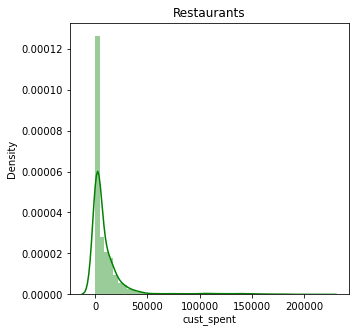

In [69]:
plt.figure(figsize=(5,5))
sns.distplot(summ5_pp['cust_spent'], color='g').set_title('Restaurants')


Text(0.5, 1.0, 'Restaurants')

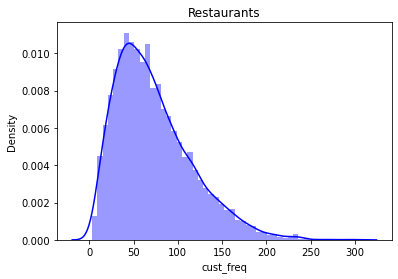

In [70]:
sns.distplot(summ5_pp['cust_freq'], color='b').set_title('Restaurants')

In [71]:
 for k, v in summ5_pp.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(summ5_pp)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column customer_id outliers = 0.00%
Column cust_lvl outliers = 0.00%
Column age outliers = 1.06%
Column AgeGroup outliers = 0.38%
Column Credit_limit_Group outliers = 1.67%
Column c_tier outliers = 100.00%
Column c_city_grp outliers = 0.00%
Column c_Region_E outliers = 100.00%
Column c_Region_N outliers = 0.00%
Column c_Region_S outliers = 100.00%
Column c_Region_W outliers = 0.00%
Column mar_status_M outliers = 0.00%
Column mar_status_S outliers = 0.00%
Column gender_M outliers = 0.00%
Column customer_country_India outliers = 100.00%
Column cust_freq outliers = 1.98%
Column cust_spent outliers = 7.75%
Column change_city outliers = 2.04%
Column change_state outliers = 2.08%
Column change_country outliers = 100.00%
Column cust_pi_cn_Restaurants outliers = 7.44%
Column cust_dow_cn_0 outliers = 9.36%
Column cust_dow_cn_1 outliers = 7.18%
Column cust_dow_cn_2 outliers = 7.14%
Column cust_dow_cn_3 outliers = 7.17%
Column cust_dow_cn_4 outliers = 6.83%
Column cust_dow_cn_5 outliers = 7.18%
C

In [24]:
summ5_pp.head()

customer_id  cust_lvl  age  AgeGroup  Credit_limit_Group  c_tier  \
5      10000553         2   57         5                   0       1   
6      10000652         1   46         5                   1       1   
12     10001161         3   41         4                   1       1   
13     10001215         3   45         5                   0       1   
15     10001421         3   42         4                   0       1   

    c_city_grp  c_Region_E  c_Region_N  c_Region_S  ...  cust_month_cn_3  \
5            2           0           1           0  ...              1.0   
6            2           0           1           0  ...              3.0   
12           1           0           0           1  ...              2.0   
13           1           0           0           0  ...              7.0   
15           1           1           0           0  ...              1.0   

    cust_month_cn_4  cust_month_cn_5  cust_month_cn_6  cust_month_cn_7  \
5               1.0              0.0              0.0              1.0   
6               0.0              3.0              0.0              3.0   
12              2.0              4.0              3.0              3.0   
13              5.0              5.0              0.0              1.0   
15              1.0              2.0              0.0              1.0   

    cust_month_cn_8  cust_month_cn_9  cust_month_cn_10  cust_month_cn_11  \
5               0.0              1.0               1.0               0.0   
6               2.0              3.0               0.0               0.0   
12              2.0              1.0               0.0               1.0   
13              2.0              5.0               4.0               4.0   
15              0.0              0.0               3.0               2.0   

    purchase  
5          0  
6          0  
12         1  
13         1  
15         1  

[5 rows x 40 columns]

In [77]:
df_summ5_pp_data_2 = summ5_pp[~(summ5_pp['cust_spent'] >= 30000)]
#df_boston_data_2 = df_summ5_pp_data_2[~(df_summ5_pp_data_2['BLACK'] <= 350.0)]
df_summ5_pp_data_2 = df_summ5_pp_data_2[~(df_summ5_pp_data_2['cust_pi_cn_Restaurants'] >= 40)]

 
print(np.shape(df_summ5_pp_data_2))

(5083, 40)


In [73]:
df_summ5_pp_data_2.cust_spent.head()

0      836.27
1     9628.78
2     4965.60
3    12690.24
4     5139.79
Name: cust_spent, dtype: float64

Text(0.5, 1.0, 'Restaurants')

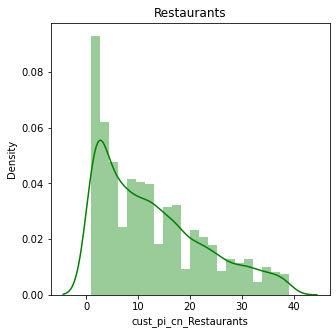

In [78]:
plt.figure(figsize=(5,5))
sns.distplot(df_summ5_pp_data_2['cust_pi_cn_Restaurants'], color='g').set_title('Restaurants')


In [75]:
 for k, v in df_summ5_pp_data_2.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df_summ5_pp_data_2)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column customer_id outliers = 0.00%
Column cust_lvl outliers = 0.00%
Column age outliers = 0.99%
Column AgeGroup outliers = 0.33%
Column Credit_limit_Group outliers = 1.61%
Column c_tier outliers = 100.00%
Column c_city_grp outliers = 0.00%
Column c_Region_E outliers = 100.00%
Column c_Region_N outliers = 0.00%
Column c_Region_S outliers = 100.00%
Column c_Region_W outliers = 0.00%
Column mar_status_M outliers = 0.00%
Column mar_status_S outliers = 0.00%
Column gender_M outliers = 0.00%
Column customer_country_India outliers = 100.00%
Column cust_freq outliers = 2.09%
Column cust_spent outliers = 3.98%
Column change_city outliers = 2.09%
Column change_state outliers = 2.12%
Column change_country outliers = 100.00%
Column cust_pi_cn_Restaurants outliers = 7.88%
Column cust_dow_cn_0 outliers = 7.32%
Column cust_dow_cn_1 outliers = 6.89%
Column cust_dow_cn_2 outliers = 6.74%
Column cust_dow_cn_3 outliers = 6.79%
Column cust_dow_cn_4 outliers = 6.56%
Column cust_dow_cn_5 outliers = 6.82%
C

<h1 style="color:DodgerBlue;">Feature Selection</h1>

[12:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy: 0.7620452310717798


Text(0.5, 0, 'Xgboost Feature Importance')

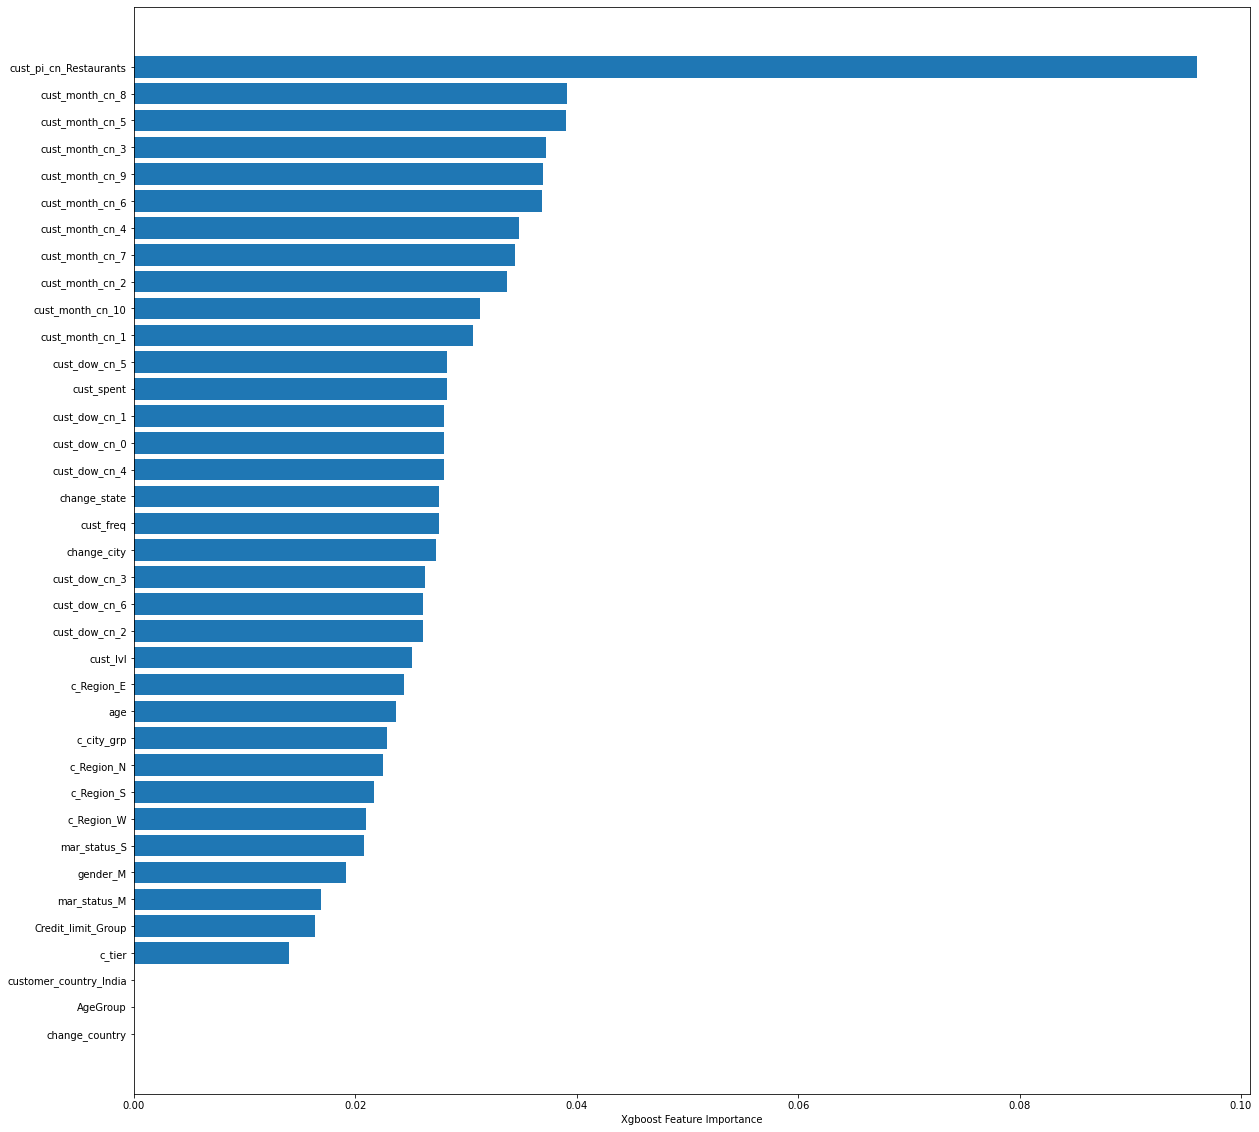

In [79]:

from sklearn.model_selection import train_test_split, cross_val_score

summ5_pp1 = df_summ5_pp_data_2.copy()
# drop unique
summ5_pp1.drop(['customer_id','cust_month_cn_11'], axis=1, inplace=True)

modeling_data = summ5_pp1

X = modeling_data.drop("purchase", axis=1)
y = modeling_data["purchase"]

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error as MSE
# define model
model = XGBClassifier()
model.fit(X_train,y_train)

# Predict the model
y_pred = model.predict(X_test)
  
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("XGB Accuracy:",metrics.accuracy_score(y_test, y_pred))

fig, ax = plt.subplots(figsize=(20,20))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [80]:
summ5_pp2 = df_summ5_pp_data_2.copy()
# drop unique
summ5_pp2.drop(['customer_id','cust_month_cn_11','AgeGroup','c_tier','change_country','customer_country_India' ], axis=1, inplace=True)


<h1 style="color:DodgerBlue;">Hyper Parameter Optimization</h1>

In [81]:
# Data Handling
from pandas import read_csv
import os
import pandas as pd
import numpy as np
import time

# Modeling
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Visualization
import matplotlib
from matplotlib import pyplot

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [82]:

from sklearn.model_selection import train_test_split, cross_val_score


modeling_data = summ5_pp2

X = modeling_data.drop("purchase", axis=1)
y = modeling_data["purchase"]

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [83]:
## Hyper Parameter Optimization
n_estimators = range(100, 1600, 100)
max_depth = range(3, 21, 1)
learning_rate = [0.01, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3] 
gamma = [ 0.0, 0.1,  0.4,   0.9, 1 , 2, 5 , 10, 15, 20 ]

min_child_weight = range(1, 21, 1)
subsample = [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]
colsample_bytree = [ 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0  ]

reg_lambda = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]
reg_alpha = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

scale_pos_weight = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

max_delta_step  = range(0, 21, 1)


In [84]:
# Modeling
import xgboost
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Create Model Object
classifier=xgboost.XGBClassifier()

# Initiate start time
start_time = time.time()

# Parameters
params = dict(learning_rate = learning_rate, max_depth = max_depth, min_child_weight = min_child_weight, gamma = gamma, colsample_bytree = colsample_bytree, n_estimators = n_estimators, subsample=subsample )

# Check Best parameters
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=1)
random_result = random_search.fit(X_train,y_train)

# Check Execution time
end_time = time.time()
execution_time = (end_time - start_time)
print("Successfully executed in", round(execution_time/60,1), "mins")


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.8s finished


[12:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Successfully executed in 0.4 mins


In [85]:
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=17,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=2,  monotone_constraints='()',
              n_estimators=2000, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
score=cross_val_score(classifier,X,y,cv=kfold)
score.mean()

[12:08:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:08:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.7802495373918968

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score


modeling_data = summ5_pp2

X = modeling_data.drop("purchase", axis=1)
y = modeling_data["purchase"]

# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


## Hyper Parameter Optimization
n_estimators = range(100, 1600, 100)
max_depth = range(3, 21, 1)
learning_rate = [0.01, 0.03, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3] 
gamma = [ 0.0, 0.1,  0.4,   0.9, 1 , 2, 5 , 10, 15, 20 ]

min_child_weight = range(1, 21, 1)
subsample = [0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]
colsample_bytree = [ 0.1, 0.2 , 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0  ]

reg_lambda = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]
reg_alpha = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

scale_pos_weight = [1e-5,1e-4,1e-3, 1e-2, 0.1, 1,10, 100]

max_delta_step  = range(0, 21, 1)


classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=2,  monotone_constraints='()',
              n_estimators=2000, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

from sklearn.model_selection import cross_val_score
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
score=cross_val_score(classifier,X,y,cv=kfold)
score.mean()

                                   
Processing Preference model for  Restaurants
Size of df Restaurants (139569, 54)
df_summdata_cust_pi_cn with size :  (6528, 2)
df_summdata_cust_month_cn with size :  (6528, 12)
df_summdata_cust_dow_cn with size :  (6528, 8)
size before dropping null (9533, 40)
size after dropping null (6528, 40)
Feature Importance for  Restaurants


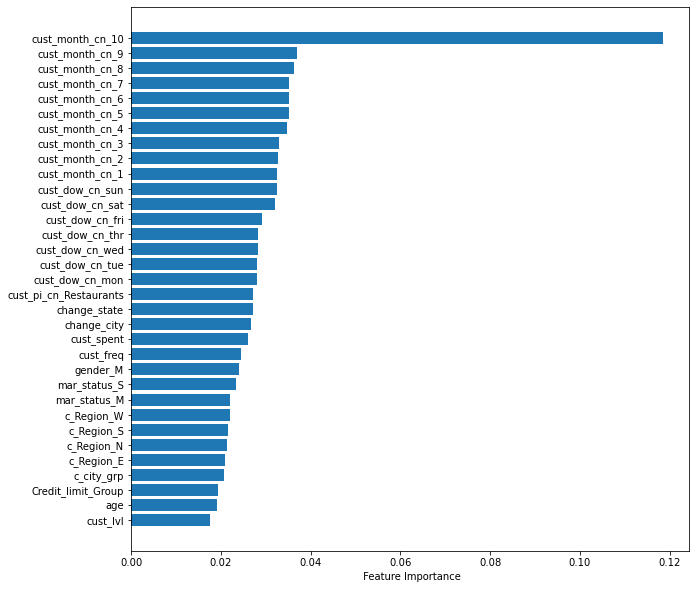

                                   
Mean Accuracy Score for  Restaurants  :  78.81 %
                                   
                                   
                                   
Processing Preference model for  Retail_Outlet
Size of df Retail_Outlet (123744, 54)
df_summdata_cust_pi_cn with size :  (4333, 2)
df_summdata_cust_month_cn with size :  (4333, 12)
df_summdata_cust_dow_cn with size :  (4333, 8)
size before dropping null (9533, 40)
size after dropping null (4333, 40)
Feature Importance for  Retail_Outlet


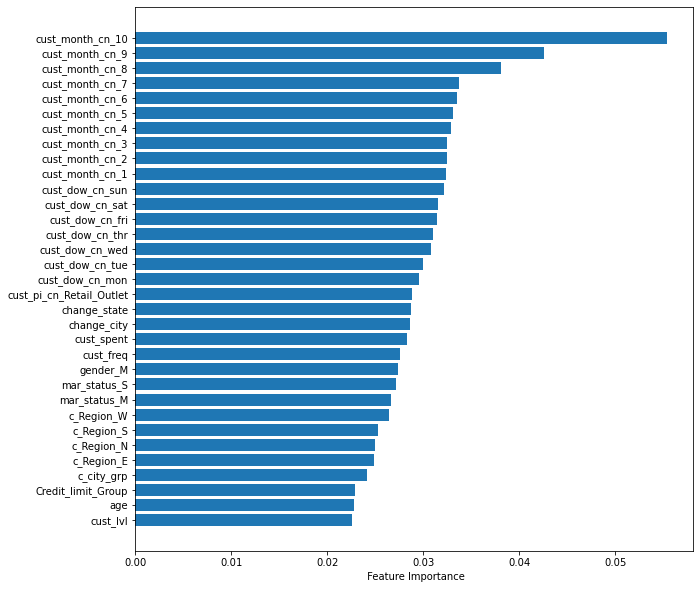

                                   
Mean Accuracy Score for  Retail_Outlet  :  72.42 %
                                   
                                   
                                   
Processing Preference model for  Household
Size of df Household (16312, 54)
df_summdata_cust_pi_cn with size :  (3561, 2)
df_summdata_cust_month_cn with size :  (3561, 12)
df_summdata_cust_dow_cn with size :  (3561, 8)
size before dropping null (9533, 40)
size after dropping null (3561, 40)
Feature Importance for  Household


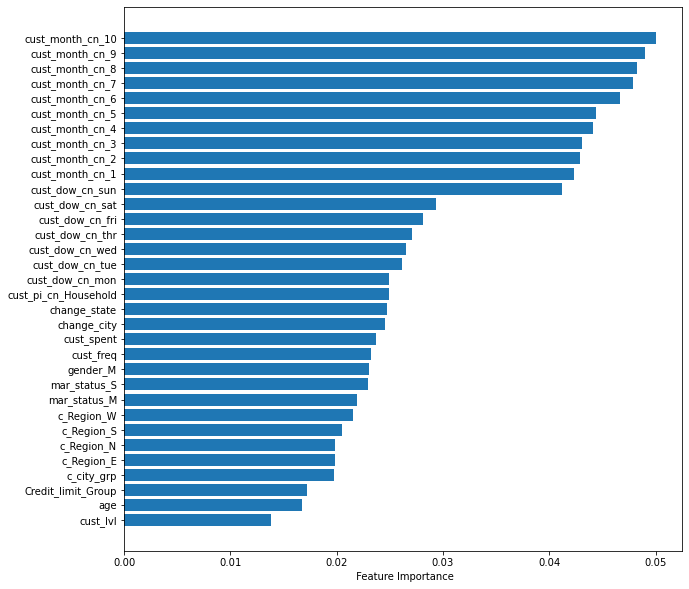

                                   
Mean Accuracy Score for  Household  :  85.17 %
                                   
                                   
                                   
Processing Preference model for  Art
Size of df Art (19374, 54)
df_summdata_cust_pi_cn with size :  (4217, 2)
df_summdata_cust_month_cn with size :  (4217, 12)
df_summdata_cust_dow_cn with size :  (4217, 8)
size before dropping null (9533, 40)
size after dropping null (4217, 40)
Feature Importance for  Art


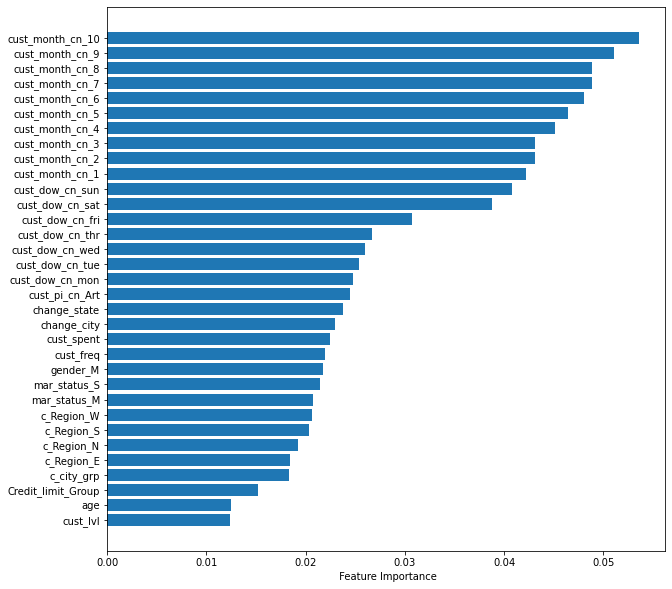

                                   
Mean Accuracy Score for  Art  :  86.22 %
                                   
                                   
                                   
Processing Preference model for  Airlines
Size of df Airlines (40812, 54)
df_summdata_cust_pi_cn with size :  (3245, 2)
df_summdata_cust_month_cn with size :  (3245, 12)
df_summdata_cust_dow_cn with size :  (3245, 8)
size before dropping null (9533, 40)
size after dropping null (3245, 40)
Feature Importance for  Airlines


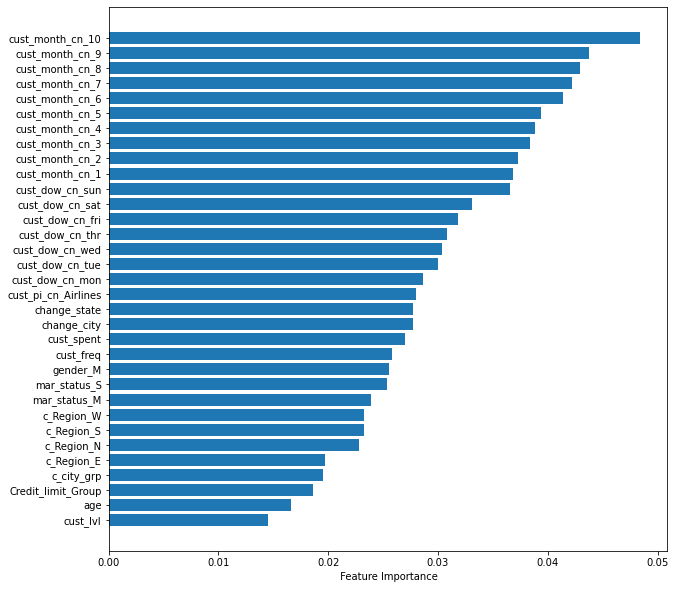

                                   
Mean Accuracy Score for  Airlines  :  82.13 %
                                   
                                   
                                   
Processing Preference model for  Lodging
Size of df Lodging (45018, 54)
df_summdata_cust_pi_cn with size :  (3291, 2)
df_summdata_cust_month_cn with size :  (3291, 12)
df_summdata_cust_dow_cn with size :  (3291, 8)
size before dropping null (9533, 40)
size after dropping null (3291, 40)
Feature Importance for  Lodging


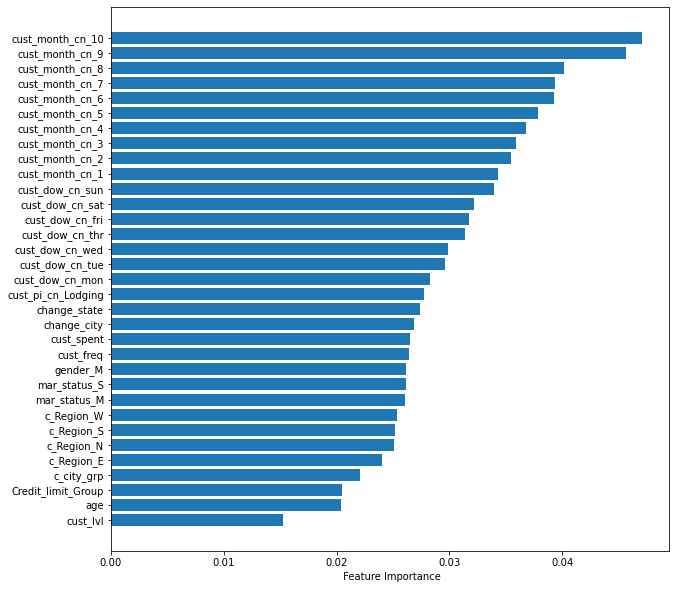

                                   
Mean Accuracy Score for  Lodging  :  77.51 %
                                   
                                   
                                   
Processing Preference model for  Clothing
Size of df Clothing (47610, 54)
df_summdata_cust_pi_cn with size :  (3227, 2)
df_summdata_cust_month_cn with size :  (3227, 12)
df_summdata_cust_dow_cn with size :  (3227, 8)
size before dropping null (9533, 40)
size after dropping null (3227, 40)
Feature Importance for  Clothing


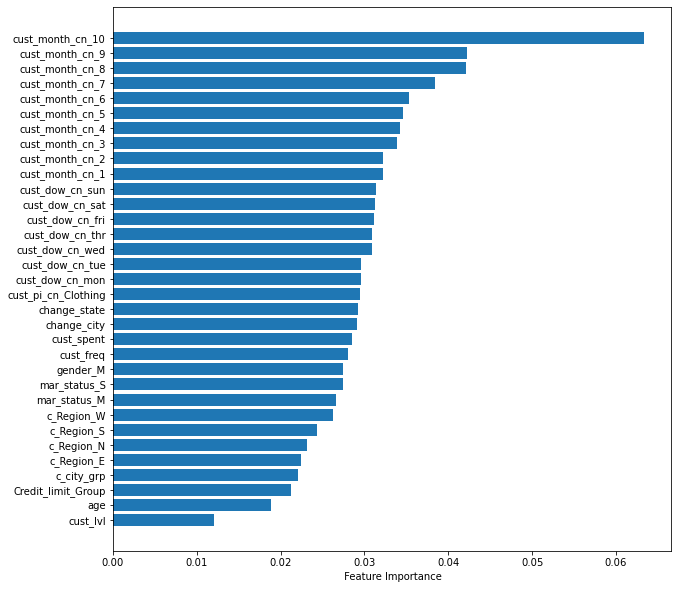

                                   
Mean Accuracy Score for  Clothing  :  73.66 %
                                   
                                   
Successfully executed in 3.7 mins


Purchase preference Model Generated for all the purchase Interests


In [128]:

# Initiate start time
start_time = time.time()
result = []
pi = base2.purchase_interest.unique()
for x in pi:
    df_basedata_pp = base2[base2['purchase_interest'].isin([x])]
    
    print('                                   ')
    print('===================================')
    print('Processing Preference model for ',x)
    print('Size of df',x,df_basedata_pp.shape)
    #Restaurant

    df_basedata_pp_cn = df_basedata_pp.groupby(['customer_id', 'purchase_interest']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_pi_cn = pd.pivot_table(df_basedata_pp_cn, index='customer_id', columns='purchase_interest', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_pi_cn.columns = df_summdata_cust_pi_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_pi_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.reset_index()                #index to columns
    df_summdata_cust_pi_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_pi_cn = df_summdata_cust_pi_cn.add_prefix('cust_pi_cn_')
    print("df_summdata_cust_pi_cn with size : ", df_summdata_cust_pi_cn.shape)


    df_basedata_9_month_cn = df_basedata_pp.groupby(['customer_id', 'transaction_month']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_month_cn = pd.pivot_table(df_basedata_9_month_cn, index='customer_id', columns='transaction_month', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_month_cn.columns = df_summdata_cust_month_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_month_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_month_cn = df_summdata_cust_month_cn.reset_index()                #index to columns
    df_summdata_cust_month_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_month_cn = df_summdata_cust_month_cn.add_prefix('cust_month_cn_')
    print("df_summdata_cust_month_cn with size : ", df_summdata_cust_month_cn.shape)


    df_basedata_9_dow_cn = df_basedata_pp.groupby(['customer_id', 'transaction_dayofweek']).count()[['tran_amount']].reset_index()

    # Convert the running list of user ratings into a matrix using the 'pivot table' function
    df_summdata_cust_dow_cn = pd.pivot_table(df_basedata_9_dow_cn, index='customer_id', columns='transaction_dayofweek', aggfunc=np.sum, fill_value=0)

    # Reset Index
    df_summdata_cust_dow_cn.columns = df_summdata_cust_dow_cn.columns.droplevel(0) #remove tran_amount
    df_summdata_cust_dow_cn.columns.name = None               #remove mcc_code
    df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.reset_index()                #index to columns
    df_summdata_cust_dow_cn.head()

    #Add Prefix - add_prefix('cust_mcc_cn_')
    df_summdata_cust_dow_cn = df_summdata_cust_dow_cn.add_prefix('cust_dow_cn_')
    # Rename 
    df_summdata_cust_dow_cn.rename(columns={"cust_dow_cn_0": "cust_dow_cn_mon", "cust_dow_cn_1": "cust_dow_cn_tue", "cust_dow_cn_2": "cust_dow_cn_wed", "cust_dow_cn_3": "cust_dow_cn_thr", "cust_dow_cn_4": "cust_dow_cn_fri", "cust_dow_cn_5": "cust_dow_cn_sat", "cust_dow_cn_6": "cust_dow_cn_sun"}, inplace = True)

    print("df_summdata_cust_dow_cn with size : ", df_summdata_cust_dow_cn.shape)


    # Merge 
    summ1_pp = pd.merge(customer_demographic, df_cust_freq_spent, left_on=['customer_id'], right_on=['customer_id'], how='left')
    summ2_pp = pd.merge(summ1_pp, df_cust_loc_change, left_on=['customer_id'], right_on=['customer_id'], how='left')


    summ3_pp = pd.merge(summ2_pp, df_summdata_cust_pi_cn, left_on=['customer_id'], right_on=['cust_pi_cn_customer_id'], how='left')

    summ4_pp = pd.merge(summ3_pp, df_summdata_cust_dow_cn, left_on=['customer_id'], right_on=['cust_dow_cn_customer_id'], how='left')

    summ5_pp1 = pd.merge(summ4_pp, df_summdata_cust_month_cn, left_on=['customer_id'], right_on=['cust_month_cn_customer_id'], how='left')



    # Drop Columns from right side

    summ5_pp1.drop(['cust_pi_cn_customer_id','cust_month_cn_customer_id', 'cust_dow_cn_customer_id'], axis=1, inplace=True)


    summ5_pp1['purchase'] = np.where(summ5_pp1['cust_month_cn_11'] > 0, 1, 0)

    print("size before dropping null", summ5_pp1.shape)
    ## using dropna() function  
    summ5_pp = summ5_pp1.dropna()
    print("size after dropping null", summ5_pp.shape)
    
  

    from sklearn.model_selection import train_test_split, cross_val_score

    summ5_pp1 = summ5_pp.copy()
    # drop unique
    summ5_pp1.drop(['customer_id','cust_month_cn_11','AgeGroup','c_tier','change_country','customer_country_India' ], axis=1, inplace=True)

    modeling_data = summ5_pp1

    X = modeling_data.drop("purchase", axis=1)
    y = modeling_data["purchase"]

    # Split data to 80% training data and 20% of test to check the accuracy of our model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    print('===================================')
    print('Feature Importance for ',x)
    classifier = XGBClassifier()
    classifier.fit(X_train,y_train)
    fig, ax = plt.subplots(figsize=(10,10))
    sorted_idx = classifier.feature_importances_.argsort()
    plt.barh(X.columns, classifier.feature_importances_[sorted_idx])
    plt.xlabel(" Feature Importance")
    plt.show()
   
    classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.15, max_delta_step=0, max_depth=10,
                  min_child_weight=2,  monotone_constraints='()',
                  n_estimators=2000, n_jobs=12, num_parallel_tree=1, random_state=0,
                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
                  tree_method='exact', validate_parameters=1, verbosity=0)

    from sklearn.model_selection import cross_val_score
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
    score=cross_val_score(classifier,X,y,cv=kfold)
    mean_score = score.mean()
    result.append((x,round(mean_score*100,2),len(summ5_pp) ))
    print('                                   ')
    print("Mean Accuracy Score for ", x, " : ", round(mean_score*100,2), "%")
    print('===================================')
    print('                                   ')
    print('                                   ')
    

    
# Check Execution time
end_time = time.time()
execution_time = (end_time - start_time)
print("Successfully executed in", round(execution_time/60,1), "mins")

pd.DataFrame(result)
    
df = pd.DataFrame(result, columns =['Purchase Interest', 'Accuracy', 'Customers']) 
df 
import plotly.express as px

fig = px.line(df, x="Purchase Interest" , y="Accuracy", title='Performance for Purchase Interests')

fig.show()
print('Purchase preference Model Generated for all the purchase Interests')

In [116]:
df.head(10)

Purchase Interest  Accuracy  Customers
0       Restaurants     78.81       6528
1     Retail_Outlet     72.42       4333
2         Household     85.17       3561
3               Art     86.22       4217
4          Airlines     82.13       3245
5           Lodging     77.51       3291
6          Clothing     73.66       3227

References:

    https://machinelearningmastery.com/linear-regression-for-machine-learning/
    https://machinelearningmastery.com/elastic-net-regression-in-python/
    https://machinelearningmastery.com/lasso-regression-with-python/
    https://machinelearningmastery.com/ridge-regression-with-python/
    https://www.mygreatlearning.com/blog/what-is-ridge-regression/
    https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/
    https://mljar.com/blog/feature-importance-xgboost/
    
    